# Time Series  Forecast Overview

Main goal of this notebook is to explore different approaches to time series forecast, starting from the easier toward the most complicated one like state of the art neural network sequences modeling

In order to compare different techniques in a meaningful way we try to make the same kind of prediction using the well known power electricity data of the Filippetti IoT demo

Before the comparison we present a brief summary of the main terminology and best practices for time series problems

### Simple explanations and main considerations about time series

1. Inputs vs. Outputs

> __Inputs__: Historical data provided to the model in order to make a single forecast.<br>
> __Outputs__: Prediction or forecast for a future time step beyond the data provided as input.

2. Endogenous vs. Exogenous

> __Endogenous__: Input variables that are influenced by other variables in the system and on which the output variable depends.<br>
> __Exogenous__: Input variables that are not influenced by other variables in the system and on which the output variable depends.

3. Regression vs. Classification

> __Regression__: Forecast a numerical quantity.<br>
> __Classification__: Classify as one of two or more labels.

4. Unstructured vs. Structured

> __Unstructured__: No obvious systematic time-dependent pattern in a time series variable.<br>
> __Structured__: Systematic time-dependent patterns in a time series variable (e.g. trend and/or seasonality).

5. Univariate vs. Multivariate

> __Univariate__: One variable measured over time.<br>
> __Multivariate__: Multiple variables measured over time.

6. Single-step vs. Multi-step

> __One-Step__: Forecast the next time step.<br>
> __Multi-Step__: Forecast more than one future time steps.

7. Static vs. Dynamic

> __Static__: A forecast model is fit once and used to make predictions.<br>
> __Dynamic__: A forecast model is fit on newly available data prior to each prediction.

8. Contiguous vs. Discontiguous

> __Contiguous__: Observations are made uniform over time.<br>
> __Discontiguous__: Observations are not uniform over time.

### List of basic models that could be applied in increasing order of complexity

* __Baseline__
    * Persistence (grid search the lag observation that is persisted)
    * Rolling moving average
    * …
* __Autoregression__ `(add a V at the beginning for multivariate equivalent)`
    * ARMA for stationary data
    * ARIMA for data with a trend
    * SARIMA for data with seasonality
    * …
* __Exponential Smoothing__
    * Simple Smoothing
    * Holt Winters Smoothing
    * …
* __Linear Machine Learning__
    * Linear Regression
    * Ridge Regression
    * Lasso Regression
    * Elastic Net Regression
    * …
* __Nonlinear Machine Learning__
    * k-Nearest Neighbors
    * Classification and Regression Trees
    * Support Vector Regression
    * …
* __Ensemble Machine Learning__
    * Bagging
    * Boosting
    * Random Forest
    * Gradient Boosting
    * …
* __Deep Learning__
    * MLP
    * CNN
    * LSTM
    * Hybrids
    * …

### Strategies

#### __1. Strategy for Exploration and Exploitation__

I would recommend two different approaches that should be used in tandem:

> __Diagnostics__: Diagnostics involve performing a run with one set of hyperparameters and producing a trace of the model skill on the training and test dataset each training epoch <br>
> __Grid Search__: Based on learnings from diagnostic results, the grid search provides a sweep across a suite of values for specific model hyperparameters such as the number of neurons, batch size, and so on

I would strongly encourage you to test every assumption you have about the model. This includes simple things like data scaling, weight initialization, and even the choice of activation function, loss function, and more.

#### __2. Strategy for Handling Data Size__

I recommend a strategy of working with smaller samples of data first to test ideas and slowly increasing the amount of data to see if things learned on the small samples hold on larger samples.

> _1 week sample_ <br>
> _1 month sample_ <br>
> _1 year sample_ <br>
> _all data_ <br>

The benefit of this approach is that you can very quickly test ideas, in minutes, with multiple repeats (e.g. statistically significant) and then later scale up only those promising ideas to more and more data.

#### __3. Strategy for Model Complexity__

We can scale the complexity of the problem and see what works at one level of complexity (e.g. univariate inputs) holds at more complex levels of complexity (multivariate inputs).

> _Univariate input, single-step output_ <br>
> _Univariate input, multi-step output_ <br>
> _Multivariate inputs, single-step output_ <br>
> _Multivariate inputs, multi-step output_ <br>

At each step, the objective is to demonstrate that the addition of complexity can lift the skill of the model.

> _Can a neural network model outperform a persistence forecast model?_ <br>
> _Can a neural network model outperform a linear forecast model?_ <br>
> _Can exogenous input variables lift the skill of the model over a univariate input?_ <br>
> _Can a direct a multi-step forecast be more skillful than a recursive single-step forecast?_ <br>

This same approach can be used when working with more sophisticated neural network models like LSTMs.

> _Model the problem as a mapping of inputs to outputs (e.g. no internal state or BPTT)_ <br>
> _Model the problem as a mapping problem with internal state across input sequences only (no BPTT)_ <br>
> _Model the problem as a mapping problem with internal state and BPTT_ <br>

At each step, the increased model complexity must demonstrate skill at or above the prior level of complexity. Said another way, the added model complexity must be justified by a commensurate increase in model skill or capability.

> _Can an LSTM outperform an MLP with a window?_ <br>
> _Can an LSTM with internal state and no BPTT outperform an LSTM where the state is reset after each sample?_ <br>
> _Can an LSTM with BPTT over input sequences outperform an LSTM that is updated after each time step?_ <br>

### Multi-Step Forecasting

__1. Direct Multi-step Forecast Strategy__

The direct method involves developing a separate model for each forecast time step.

Because separate models are used, it means that there is no opportunity to model the dependencies between the predictions, such as the prediction on day 2 being dependent on the prediction in day 1, as is often the case in time series.

__2. Recursive Multi-step Forecast__

The recursive strategy involves using a one-step model multiple times where the prediction for the prior time step is used as an input for making a prediction on the following time step.

Because predictions are used in place of observations, the recursive strategy allows prediction errors to accumulate such that performance can quickly degrade as the prediction time horizon increases.

__3. Direct-Recursive Hybrid Strategies__

The direct and recursive strategies can be combined to offer the benefits of both methods.

For example, a separate model can be constructed for each time step to be predicted, but each model may use the predictions made by models at prior time steps as input values.

__4. Multiple Output Strategy__

The multiple output strategy involves developing one model that is capable of predicting the entire forecast sequence in a one-shot manner.

Multiple output models are more complex as they can learn the dependence structure between inputs and outputs as well as between outputs.

# Raw Data Loading

#### Before to begin we load raw historical data for power electricity consumption of the ground floor of Filippetti headquarter in Falconara

Basic libraries for plotting and data mining

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.simplefilter(action='ignore')

In [4]:
# plot interattivi con plotly
# import plotly.offline as py
# import plotly.graph_objs as go

# py.init_notebook_mode()

In [5]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
sns.set()

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

Power electricity raw data from previously deserialized csv

In [7]:
rawData=pd.read_csv('C:/Users/emanuele.pomante/Desktop/Data_Science/Filippetti/progetti_sviluppo/predictive_maintenance/prototipo_sensore_predittivo/notebooks/deserialized_data/power_electricity_raw_123104256.csv')
rawData.tz = rawData.tz.astype('datetime64')
rawData.set_index('tz', inplace=True )
rawData.head()

,electric_power,rms_current
tz,,
2017-02-06 07:56:24.721,28.108482,147.263519
2017-02-06 07:57:56.882,26.364930,138.128852
2017-02-06 07:59:28.556,25.317777,132.642699
2017-02-06 08:03:22.759,27.208837,142.550174
2017-02-06 08:04:55.419,25.758277,134.950526


In order to ensure a uniform timescale data have been resampled at 1 hour, moreover constant value regions and outliers have also been removed

<IPython.core.display.Javascript object>


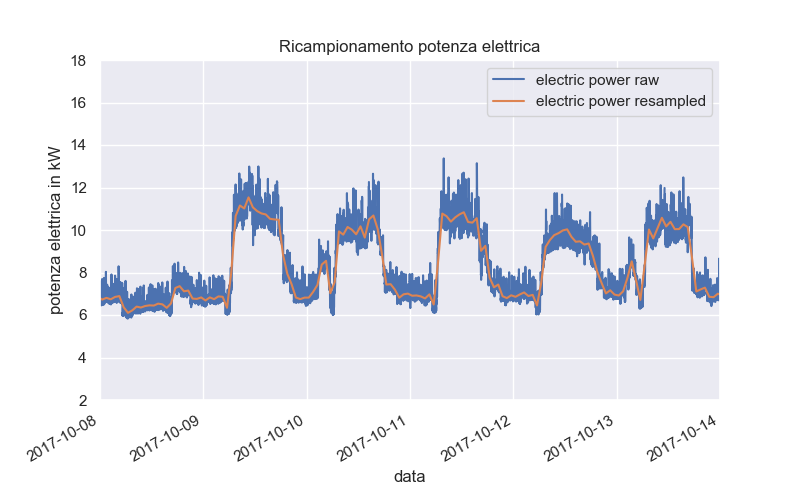

In [8]:
# drop "outliers" with a rolling statistic over a window of one day (raw sampling ~ 1 minute)
roll_avg = rawData.electric_power.rolling(1440, center=True).mean()
roll_std = rawData.electric_power.rolling(1440, center=True).std().fillna(0)
outliers = abs(rawData.electric_power-roll_avg) > (3*roll_std)
rawData.electric_power[outliers] = np.NaN

# resample at 1H to average
resampledData = rawData.resample('H', loffset='30T').mean()

# remove constant points
const_data = round(resampledData.electric_power-resampledData.electric_power.shift(1), 6) == 0
resampledData.electric_power[const_data] = np.NaN

# plot
fig, ax = plt.subplots()

rawData.electric_power.plot(ax=ax, label='electric power raw')
resampledData.electric_power.plot(ax=ax, label='electric power resampled')

ax.set(
    xlabel='data',
    ylabel='potenza elettrica in kW',
    title='Ricampionamento potenza elettrica',
    xlim=['2017-10-08','2017-10-14'],
    ylim=[2,18]
)

ax.legend()
plt.show()

# Different time series data visualizations

In this part we want to focus on some conventional visualizations that could be useful during the EDA phase in order to better understand the data you want to model

1. stacked month visualization (groups length can be changed)

<IPython.core.display.Javascript object>


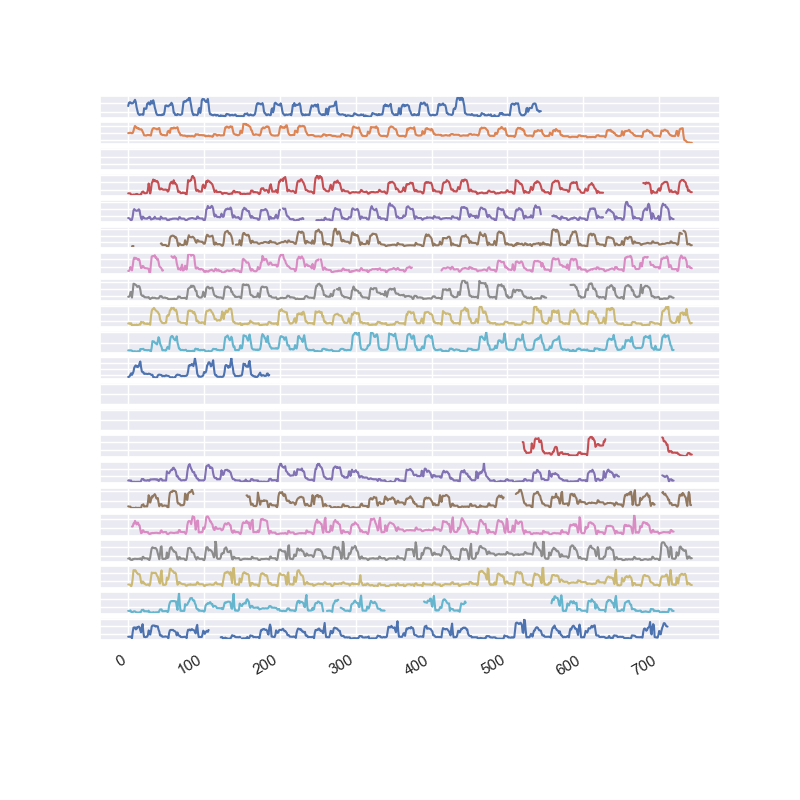

In [9]:
groups = resampledData.electric_power.groupby(pd.Grouper(freq='M'))
months = []
for name, group in groups:
    months.append(pd.Series(group.values, name=name))
months = pd.concat(months,axis=1)
axis = months.plot(subplots=True, legend=False, figsize=(8,8))
for ax in axis:
    ax.yaxis.set_ticklabels('')
plt.show()

2. simple histogram distribution of time series values

<IPython.core.display.Javascript object>


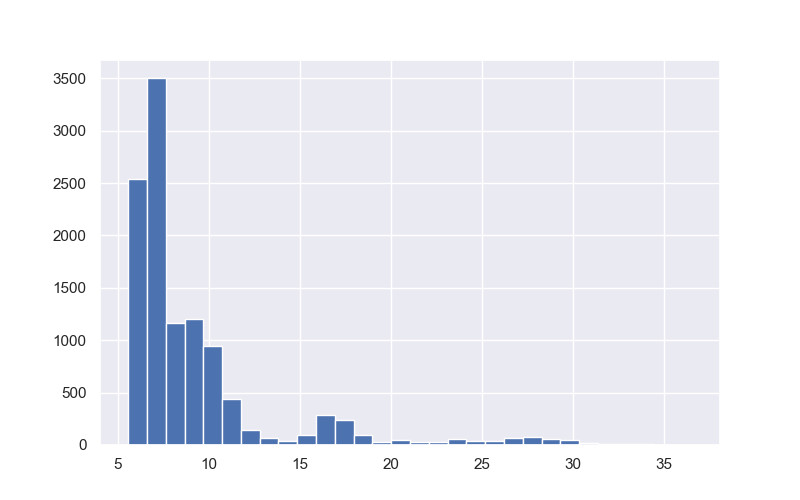

In [10]:
plt.figure()
resampledData.electric_power.hist(bins=30)
plt.show()

3. like the previous one it shows time series values density distribution (kernel density estimation plot) plot is useful to have a rapid glimpse of the average value of the timeseries

<IPython.core.display.Javascript object>


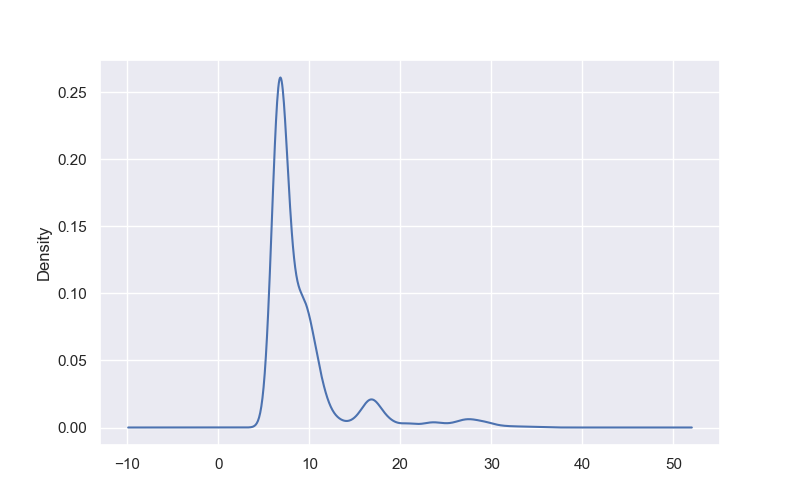

In [11]:
plt.figure()
resampledData.electric_power.plot(kind='kde')
plt.show()

4. alternatively the box-whisker plot gives you an istantaneous of values distribution in each group (in this case we have choosen months)

**_brief explanation_**

Edges of the box are the first and third quartiles then the box itself represents the IQR (interquartile range) corresponding to the central 50% of the distribution.<br>
The middle green line corresponds to the median value and the whisker bars corresponds to -1.5\*IQR and +1.5\*IQR then represent the tails of values statistical distribution.<br>
This plot is useful also to rapidly visualize outliers (represented by black circle outside the whisker bars)

<IPython.core.display.Javascript object>


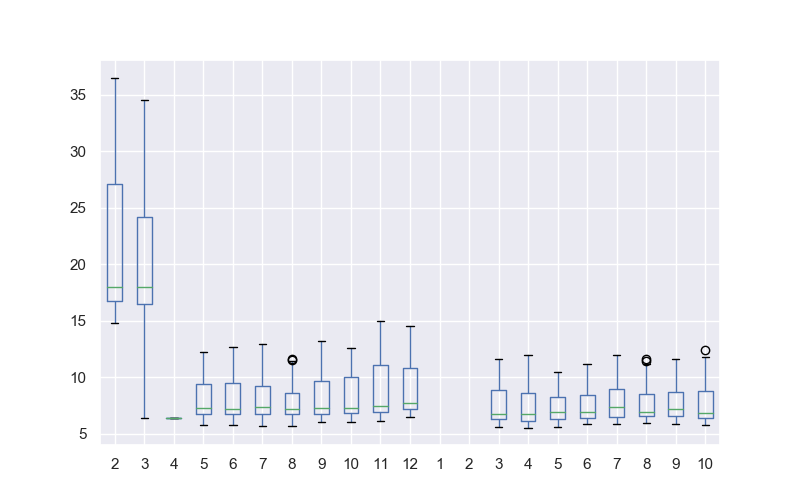

In [12]:
plt.figure()
groups = resampledData.electric_power.groupby(pd.Grouper(freq='M'))
months = []
for name, group in groups:
    months.append(pd.Series(group.values, name=name.month))
months = pd.concat(months,axis=1)
months.boxplot()
plt.show()

5. matshow command plots different groups (we always chosen months) as a value density 2D color map. Different rows represent months while colors represent value intensity (bright=higher and dark=lower) holes correspond to missing data

<IPython.core.display.Javascript object>


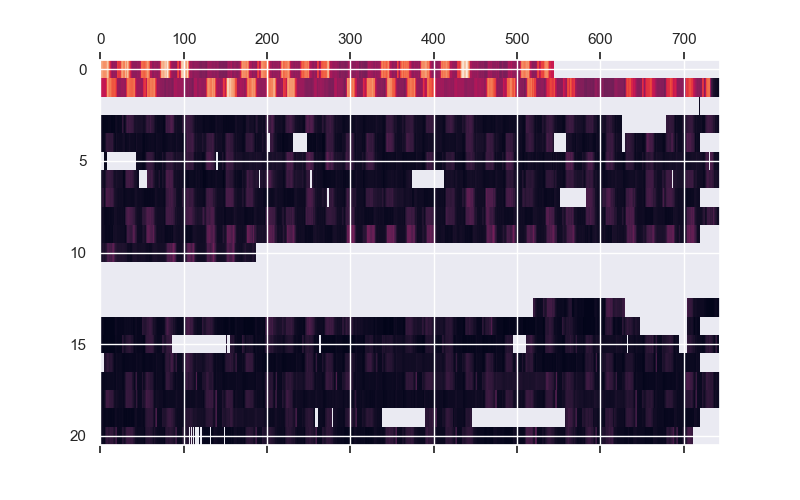

In [13]:
groups = resampledData.electric_power.groupby(pd.Grouper(freq='M'))
months = []
for name, group in groups:
    months.append(pd.Series(group.values, name=name))
months = pd.concat(months,axis=1)
months = months.T

fig, ax = plt.subplots()
ax.matshow(months, interpolation=None, aspect='auto')
plt.show()

6. the lag plot is a very simple indicator of a correlation between adjacent points of a time series, in other words a straight line indicates that values at time t-1 could be used to infer values at time t

<IPython.core.display.Javascript object>


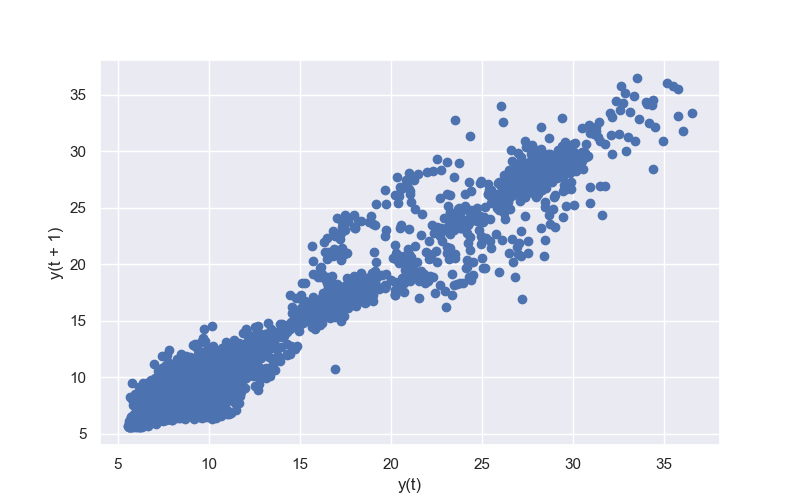

In [14]:
from pandas.tools.plotting import lag_plot
plt.figure()
lag_plot(resampledData.electric_power, c='b')
plt.show()

7. this simple snippet produce multiple plots as before but at different lags (max 9)

<IPython.core.display.Javascript object>


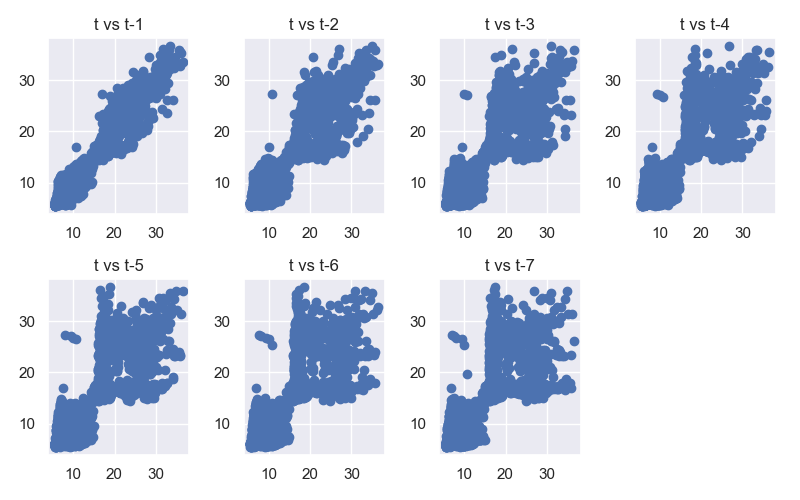

In [15]:
from pandas.plotting import scatter_matrix
values = pd.DataFrame(resampledData.electric_power.values)
lags = 7
step = 1
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i*step))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i*step))
dataframe.columns = columns
plt.figure()
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i*step))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i*step)].values)
plt.tight_layout()

8. the autocorrelation plot shows the correlation of the time series with itself for increasing lag, it is also a good indicator of periodical pattern inside the data (corresponding to peaks in the plot)

**_simple explanation_**

If we zoom the image below near the high correlation part at the beginning, we can clearly recognize daily strong periodicity corresponding to repeated peaks within 24 lag points (remember that data have been sampled at 1 hour) as well as weekly correlation peaks (168 lag points) for weekly periodicity.<br>
It is also visible the negative correlation of one year lag (lag ~ 8700)

<IPython.core.display.Javascript object>


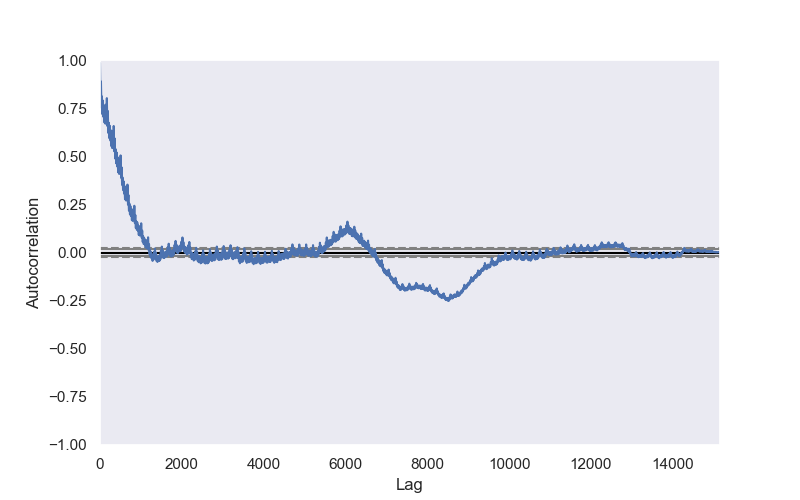

In [16]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(resampledData.electric_power.replace(np.nan,0))
plt.show()

# Normalize data

A common practice in time series analysis is to normalize data. To normalize means to rescale data such that all values lie within the range of 0 and 1


Min: 5.564006, Max: 36.533492



<IPython.core.display.Javascript object>


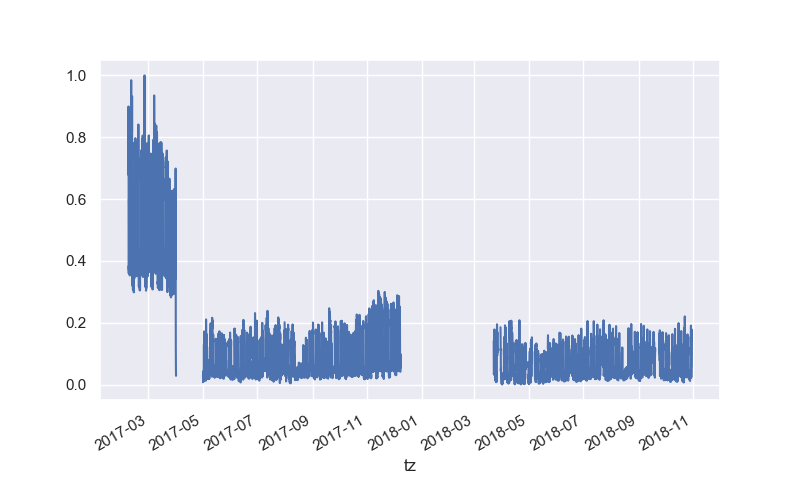

In [17]:
from sklearn.preprocessing import MinMaxScaler
# prepare data for normalization
values = resampledData.electric_power.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('')
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
print('')
# normalize the dataset and plot
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized[:,0], columns=['electric_power'], index=resampledData.index)
plt.figure()
normalized.electric_power.plot()
plt.show()

# Standardize data

Standardization is another common process which involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1


Mean: 9.306502, StandardDeviation: 4.743154



<IPython.core.display.Javascript object>


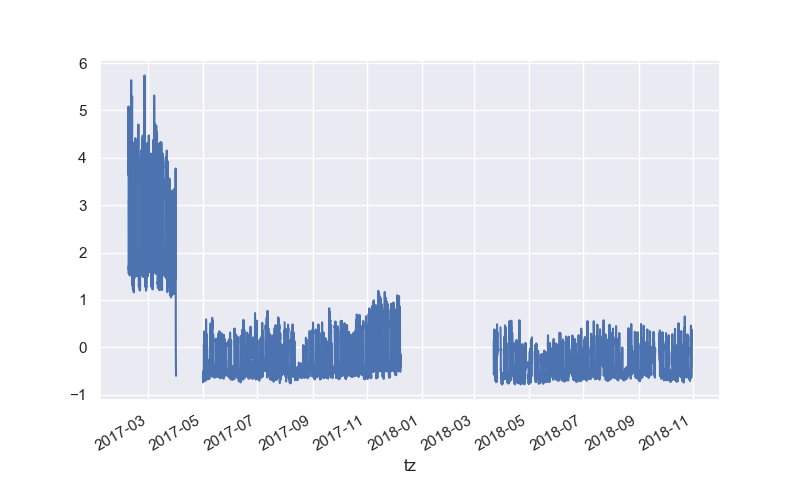

In [18]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = resampledData.electric_power.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('')
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
print('')
# standardization of the dataset and plot
standardized = scaler.transform(values)
standardized = pd.DataFrame(standardized[:,0], columns=['electric_power'], index=resampledData.index)
plt.figure()
standardized.electric_power.plot()
plt.show()

# Seasonal decomposition test

In the first test we use the "statsmodels" library to extrapolate seasonality and trend from the time series. The daily seasonality and the weekly trend are clearly visible over data

<IPython.core.display.Javascript object>


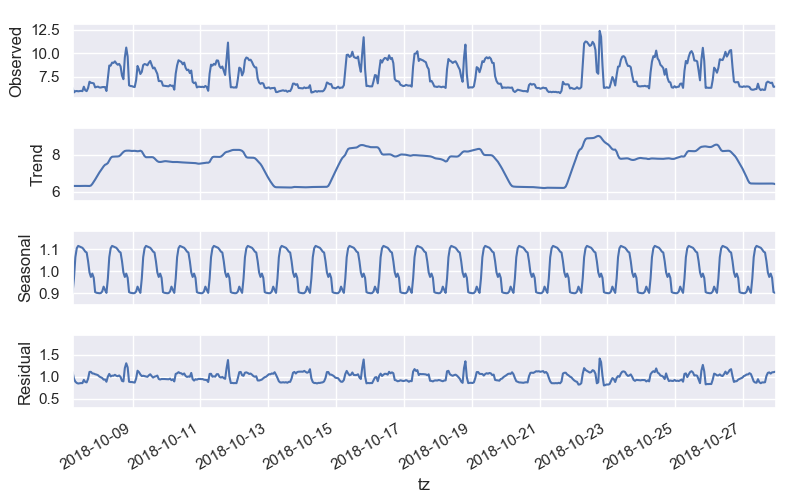

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(resampledData.electric_power.asfreq('H').ffill(), model='multiplicative')
result.plot()
plt.xlim('2018-10-08','2018-10-29')
plt.show()

# Seven basic techniques for time series prediction

Since those methods cannot deal effectively with missing data/regions, as a preliminary step we select a subset of original data to discard the big holes toward January and February 2018 and the big "step" toward May 2017

Then we log transform and normalize data and to fill small region or isolated missing points we replace all Nan with the value of the week before

Then we split the subset into other two different subsets: one for the training of the algorithms and the other (smaller) one for testing of the final optimized alghoritms

<br>

_This excursus takes inspiration from AnalyticsVidhya, so if you want more details you can visit their website:_

__[7 methods to perform Time Series forecasting (with Python codes)](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)__

<IPython.core.display.Javascript object>


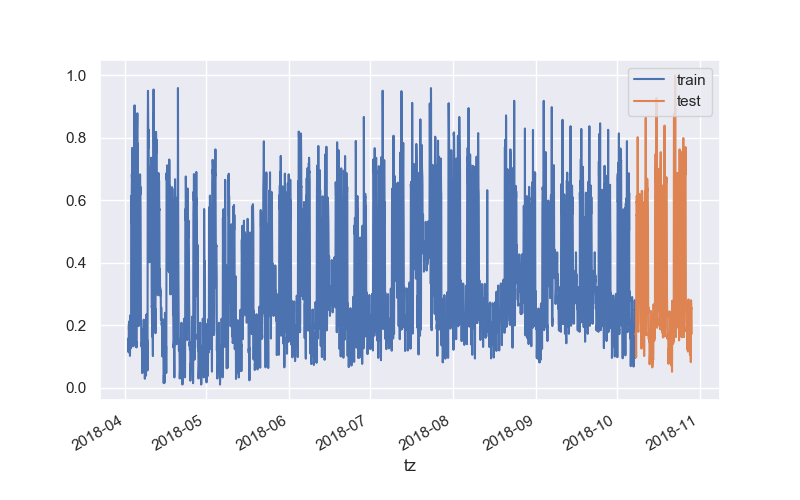

In [20]:
y = resampledData.truncate(before='2018-04-02', after='2018-10-29')
y = y[['electric_power']]

# convert to log1p
y = y.apply(lambda x: np.log1p(x))

# standardized = StandardScaler().fit(y.values).transform(y.values)
normalized = MinMaxScaler(feature_range=(0.01, 1)).fit(y.values).transform(y.values)

y = pd.Series(normalized[:,0], name='electric_power', index=y.index)

# missing values replaced with the value of the week before
for idx, value in y.iteritems():
    if np.isnan(value):
        y[idx] = y[idx-168]

y = y.to_frame()

train = y.truncate(after='2018-10-08')
test = y.truncate(before='2018-10-08')

fig, ax = plt.subplots()
train.electric_power.plot(ax=ax, label='train')
test.electric_power.plot(ax=ax, label='test')
ax.legend()
plt.show()

1. Naive Approach

_Prediction is the last available point in the assumption that new data would not change too much in time_

<IPython.core.display.Javascript object>


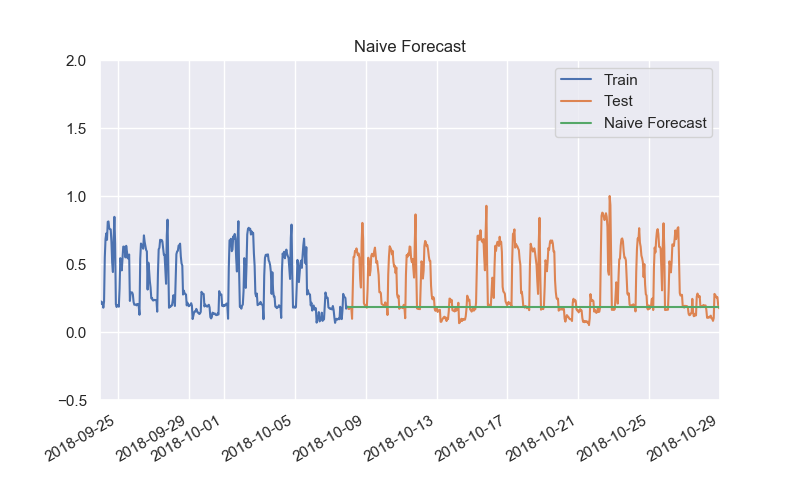

In [21]:
dd= np.asarray(train.electric_power)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
f = plt.figure()
plt.plot(train.index, train['electric_power'], label='Train')
plt.plot(test.index, test['electric_power'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.xlim('2018-09-24','2018-10-29')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

2. Simple Average

_Prediction is the average of the whole series (that is zero since series has been standardized)_

<IPython.core.display.Javascript object>


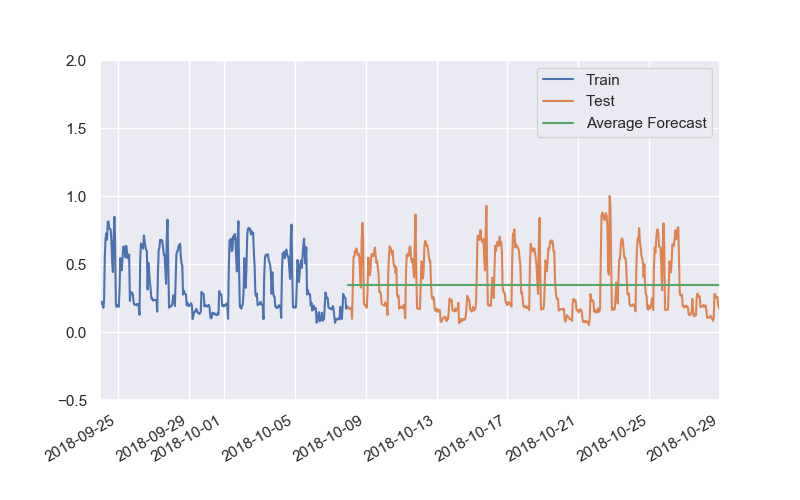

In [22]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['electric_power'].mean()
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.xlim('2018-09-24','2018-10-29')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

3. Moving Average

_Prediction is the last value of the moving average of the series with a selected window of one week_

<IPython.core.display.Javascript object>


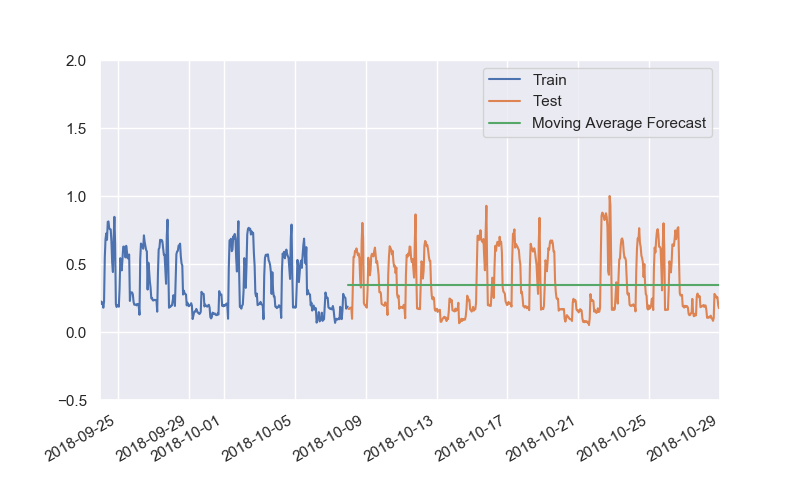

In [23]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['electric_power'].rolling(168).mean().iloc[-1]
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.xlim('2018-09-24','2018-10-29')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

4. Simple Exponential Smoothing

_Very similar to 3. but points in the moving average have assigned exponentially decreasing weights (older points are less important than the new ones)_

<IPython.core.display.Javascript object>


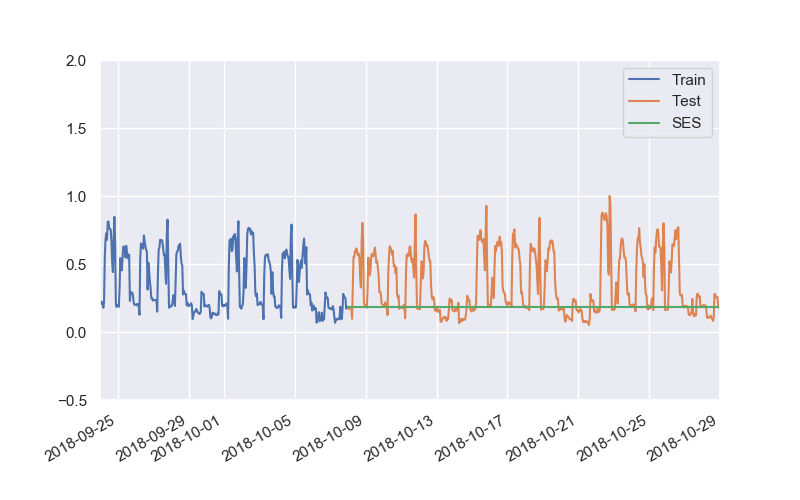

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
ses = SimpleExpSmoothing(np.asarray(train['electric_power']))
ses_fitted = ses.fit()
y_hat_avg['SES'] = ses_fitted.forecast(len(test))
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.xlim('2018-09-24','2018-10-29')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

5. Holt’s Linear Trend method

_Also known as Double Exponential Smoothing since the Simple Exponential is applied twice to extrapolate the trend component_

In [25]:
# Augmented Dickey-Fuller unit root test
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend
# Null Hypothesis (H0): the time series has a unit root (has some time dependent structure/trend)
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary (no trend).

import statsmodels.api as sm
result = sm.tsa.stattools.adfuller(train.electric_power)

print('Augmented Dickey-Fuller unit root test')
print('')

if result[1] <= 0.05 :
    print('p-value = ' + str(result[1]) + ' >> the time series is stationary with no apparent trend')
else :
    print('p-value = ' + str(result[1]) + ' >> the time series is non-stationary with a time dependant trend')

Augmented Dickey-Fuller unit root test

p-value = 1.330070687278382e-16 >> the time series is stationary with no apparent trend


<IPython.core.display.Javascript object>


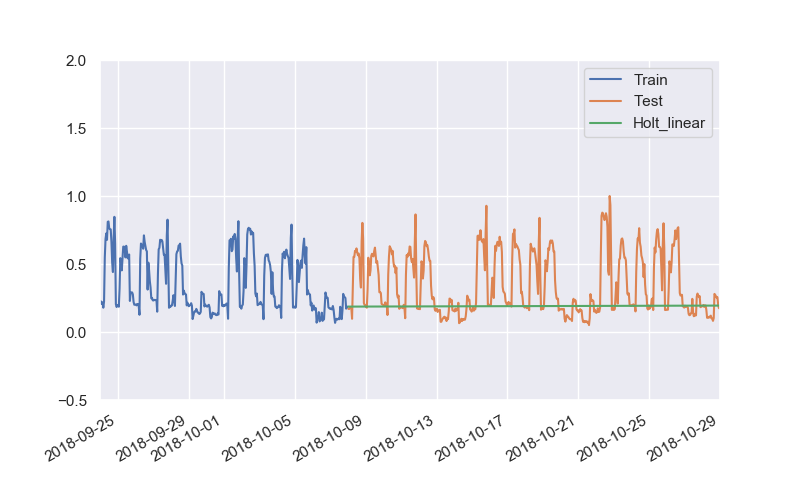

In [26]:
y_hat_avg = test.copy()
HL = Holt(np.asarray(train['electric_power']))
HL_fitted = HL.fit()
y_hat_avg['Holt_linear'] = HL_fitted.forecast(len(test))

f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.xlim('2018-09-24','2018-10-29')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

6. Holt-Winters Method

_This approach is more complete with respect to the previous one because it allows to add seasonalities (for example weekly or daily periodical pattern) to the overall trend recovered by the previous approach, in this case we impose a weekly periodicity_

<IPython.core.display.Javascript object>


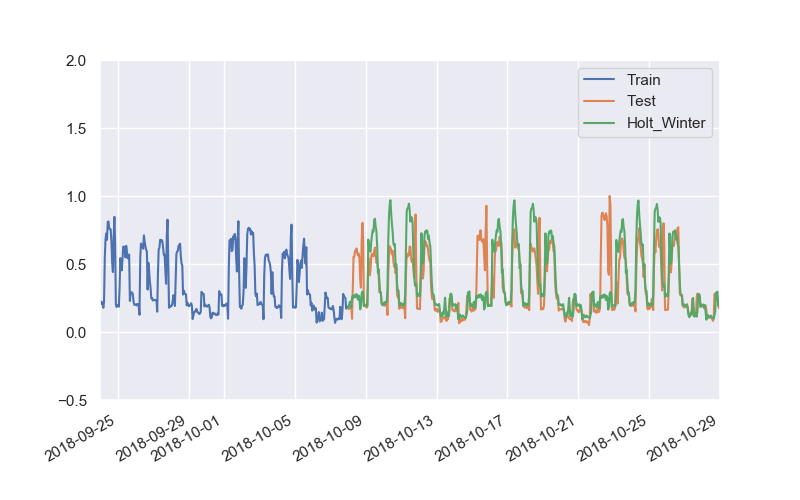

In [27]:
y_hat_avg = test.copy()
HW = ExponentialSmoothing(np.asarray(train['electric_power']), trend='add', seasonal='add', seasonal_periods=168)
HW_fitted = HW.fit(smoothing_slope=0.2, smoothing_level=0.1, use_basinhopping=True)
y_hat_avg['Holt_Winter'] = HW_fitted.forecast(len(test))

f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.xlim('2018-09-24','2018-10-29')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

7. Seasonal ARIMA (SARIMA)

_It is the most complete of the classical model, it try to extrapolate the trend and the seasonal components using three different elements for each: an autoregressive (AR) term that make use of lagged value of the dependent variable, a differencing of the time series to be made stationary called integrated (I) and the moving average (MA) that make use of lagged value of prediction errors_<br>
_The order of each element (number of lagged term to be used) can be configured and if set to zero the element is disabled so that you can chose different configurations for the model_

_trend(p,d,q)_

* _p is the number of autoregressive terms,_
* _d is the number of nonseasonal differences needed for stationarity_
* _q is the number of lagged forecast errors in the prediction equation_

_seasonal(P,D,Q,m)_

* _P Seasonal autoregressive order_
* _D Seasonal difference order_
* _Q Seasonal moving average order_
* _m The number of time steps for a single seasonal period_

_For more details visit:_

__[Introduction to ARIMA: nonseasonal models](https://people.duke.edu/~rnau/411arim.htm)__

__[A Gentle Introduction to SARIMA for Time Series Forecasting in Python](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)__

<IPython.core.display.Javascript object>


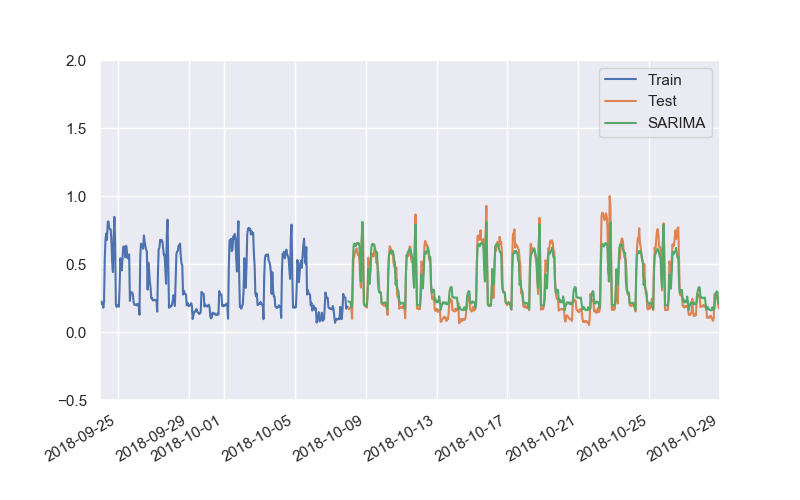

In [28]:
y_hat_avg = test.copy()
sarima = sm.tsa.statespace.SARIMAX(train.electric_power, order=(0,0,0), seasonal_order=(1,0,1,168))
sarima_fitted = sarima.fit()
y_hat_avg['SARIMA'] = sarima_fitted.predict(start='2018-10-08', end='2018-10-29', dynamic=True)
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xlim('2018-09-24','2018-10-29')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

# Neural Networks (univariate/multistep)

Neural networks are considered as an advanced approach to time series forecast, generally they are more complicated to interpret and to be implemented and more computationally expensive with respect to classical approaches seen before

Nevertheless they have some not negligibles advantages that sometimes could make the difference, in particular recurrent neural networks offers a level of flexibility in the way you can approach the problem and the modelling of time series not possible with previous techniques

Neural networks often doesn't require feature engineering, are more resistent to outliers and able to deal with missing region of data, they are able to map a general input to a desired output in an intelligent and efficient way so they are natively able to manage univariate or multivariate approach and single step or multistep prediction

In this case we will focus on univariate multistep but all the examples can be easily extended to multivariate with few modifications

Since the particular kind of network and the particular kind of architecture are the most relevant aspects which have a severe impact on the overall performance of the prediction, here we try to compare the different kind of networks and architectures for sequence modelling in order to understand pro e cons and have a broad view of better results

_All neural networks model have been developed using keras api with tensorflow backend_

*For each architecture a schematic plot will be produced in the 'net_plots' folder*

## load libraries

In [35]:
# import keras api and other libraries for models development

from time import time

from keras import backend
from keras import initializers
from keras.utils import plot_model

from keras.models import Sequential
from keras.models import Model
from keras.models import load_model

from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Masking
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Lambda
from keras.layers import Concatenate

from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop

from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2

from os import makedirs

Using TensorFlow backend.


## _definitions and data prep_

Two functions have been developed:

1. the first to convert the time series from a monodimensional array into two matrix containing the desired input and output that will be used to train our networks, matrices contain the time series represented as a 'sequence of days' or 'sequence of weeks' or 'sequence of months' etc... (this kind of configuration is part of overall problem setup)!

2. the second function is simply used to make the prediction from trained model and plot a comparison between actual and predicted data

In [181]:
def to_supervised(data, n_input, n_out):

    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end < len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            y_input = data[in_end:out_end, 0]
            y_input = y_input.reshape((len(y_input), 1))
            X.append(x_input)
            y.append(y_input)
        # move along one time step
        # questo valore rappresenta lo shift temporale tra i samples successivi della sequenza
        in_start += 24
    
    return np.array(X), np.array(y)

def predict_and_plot(input_data, target_data, sample_ind, batch_size=1, enc_tail_len=24*7):

    encode_series = input_data[sample_ind-batch_size:sample_ind,:,:]
    pred_series = model.predict(encode_series)
    
    encode_series = encode_series[-1]
    pred_series = pred_series[-1]
    target_series = target_data[sample_ind-1]
    
    encode_series_tail = encode_series[-enc_tail_len:]
    x_encode = encode_series_tail.shape[0]
    
    plt.figure()
    
    plt.plot(encode_series_tail)
    plt.plot(range(x_encode-1,x_encode-1+n_out),target_series,color='orange')
    plt.plot(range(x_encode-1,x_encode-1+n_out),pred_series,color='teal',linestyle='--')
    
    plt.title(name)
    plt.legend(['Input Series','Target Series','Predictions'])
    plt.ylim(-0.5,2)
    
    plt.show()

In [30]:
# per i test dal momento che vogliamo fare previsioni sull'arco di una settimana
# selezioniamo un subset che contenga un numero intero di settimane

# y = resampledData.truncate(before='2017-05-08', after='2018-10-29')
y = resampledData.truncate(before='2018-04-02', after='2018-10-29')

# missing values replaced with the value of the week before
for label, series in y.iteritems():
    for idx, value in series.iteritems():
        if np.isnan(value):
            series[idx] = series[idx-168]

# convert to log1p
log_converted = y.apply(lambda x: np.log1p(x))

# numpy array for keras input
dataset = log_converted.values

for a given input and output dimension time series have been converted to sequence representation, each sequence have been normalized and missing value replaced

In [31]:
n_input = 24*7*4
n_out = 24*7

input_data, target_data = to_supervised(dataset, n_input, n_out)

for i in range(input_data.shape[0]):
    scaler = MinMaxScaler(feature_range=(0.01, 1)).fit(input_data[i])
    input_data[i] = scaler.transform(input_data[i])
    target_data[i] = scaler.transform(target_data[i])

missing_value = 0

input_data[np.isnan(input_data)] = missing_value
target_data[np.isnan(target_data)] = missing_value

print(input_data.shape)
print(target_data.shape)

(175, 672, 1)
(175, 168, 1)


plot of time series represented as a sequence of inputs (blue) and outputs (green)

<IPython.core.display.Javascript object>


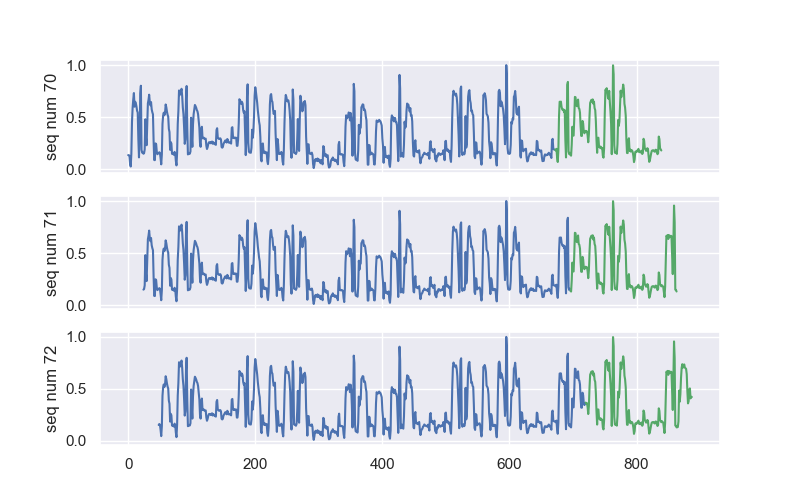

In [32]:
sequence_num = 70
sequence_step = 24

ymin=-0.5
ymax=1.5

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)

ax1.plot(input_data[sequence_num])
ax1.plot(range(n_input,n_input+n_out), target_data[sequence_num], color='g')
ax1.set_ylabel('seq num '+str(sequence_num))
# ax1.set_ylim(ymin,ymax)

ax2.plot(range(sequence_step,n_input+sequence_step), input_data[sequence_num+1])
ax2.plot(range(n_input+sequence_step,n_input+n_out+sequence_step), target_data[sequence_num+1], color='g')
ax2.set_ylabel('seq num '+str(sequence_num+1))
# ax2.set_ylim(ymin,ymax)

ax3.plot(range(sequence_step*2,n_input+sequence_step*2), input_data[sequence_num+2])
ax3.plot(range(n_input+sequence_step*2,n_input+n_out+sequence_step*2), target_data[sequence_num+2], color='g')
ax3.set_ylabel('seq num '+str(sequence_num+2))
# ax3.set_ylim(ymin,ymax)

plt.show()

## vanilla LSTM/GRU (stateful)

first architecture is a basic Long Short-Term Memory network (or GRU) which takes in input a sequence of months (4 weeks) and gives in output a sequence of weeks

the simple application of LSTM is referred to as "vanilla" LSTM

even if lstm have memory they are not very good at remembering very long sequences therefore we try to increase the capacity of the network by "stacking" together two lstm layer

moreover to better characterize periodical patterns we try first a "stateful" model which doesn't reset internal state of the lstm cell from one sequence to the other

__following a schematic representation of an LSTM chain__

<img src="figures/basic_lstm_cell_elements.png">

__in the next picture basic components of an LSTM cell and comparison with a GRU cell__

<img src="figures/lstm_gru_conceptual.png">

visit __[this link](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)__ for more details

In [33]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples, epochs, batch_size, verbose = 140, 50, 20, 1

val_n_samples = 160

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

# for the stateful approach train and validation must be defined separately because batch size have to specified
val_x = input_data[first_n_samples:val_n_samples]
val_y = target_data.reshape(-1,n_out)[first_n_samples:val_n_samples]

building the model we used some techniques to make the training process more stable and less prone to overfitting

1. batch normalization (normalizes output of the previous layer)
2. dropout (drop connections of less important nodes)
3. activity regularization (helps mantain a sparse representation of network activations)

In [36]:
name = 'vanilla_lstm'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

# define model
model = Sequential()

# aggiungo una maschera per escludere dal processo tutti i punti mancanti
# essendo il primo strato della rete definisco anche la forma dell'input
# model.add(Masking(mask_value=0, input_shape=(n_input, 1), name='input'))
# if model is stateful the batch size have to be specified
model.add(Masking(mask_value=0, batch_input_shape=(batch_size, n_input, 1), name='input'))
# next one normalizes output of the previous layer providing a more stable and faster training
model.add(BatchNormalization())

# aggiungo i vari layer
# model.add(LSTM(300, activation='softsign', return_sequences=True, bias_initializer=initializers.random_uniform()))
# model.add(LSTM(200, activation='softsign', bias_initializer=initializers.random_uniform()))

# diverse inizializzazioni possono portare il processo di ottimizzazione verso minimi locali differenti
# example: kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.random_uniform()

# le reti sequenziali possono essere "sovrapposte" (stacked RNN) in modo da creare più layer ricorrenti
# in questo caso il primo layer deve ritornare una sequenza (return_sequences=True)
model.add(GRU(600, activation='relu', return_sequences=True, stateful=True, dropout=0.2))
model.add(GRU(600, activation='relu', stateful=True, dropout=0.2))
model.add(BatchNormalization())

# la tecnica di dropout ci permette di regolarizzare il processo di ottimizzazione (exploding/vanishing gradient)
# e aiuta a ridurre il rischio di overfitting
# model.add(Dropout(0.1))

# i regolarizzatori ci permettono di stabilizzare il gradiente per combattere overfitting e exploding/vanishing gradient
# example: kernel_regularizer=l2(), activity_regularizer=l2()
model.add(Dense(400, activation='relu', activity_regularizer=l1()))
model.add(BatchNormalization())
model.add(Dense(300, activation='relu', activity_regularizer=l1()))
model.add(BatchNormalization())

#l'ultimo strato della rete è un fully connected  di dimensione pari all'output
model.add(Dense(n_out, name='output'))

# produce schematic representation of network architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Masking)              (20, 672, 1)              0         
_________________________________________________________________
batch_normalization_1 (Batch (20, 672, 1)              4         
_________________________________________________________________
gru_1 (GRU)                  (20, 672, 600)            1083600   
_________________________________________________________________
gru_2 (GRU)                  (20, 600)                 2161800   
_________________________________________________________________
batch_normalization_2 (Batch (20, 600)                 2400      
_________________________________________________________________
dense_1 (Dense)              (20, 400)                 240400    
_________________________________________________________________
batch_normalization_3 (Batch (20, 400)                 1600      
__________

Train on 140 samples, validate on 20 samples
Epoch 1/50
140/140 [==============================] - 46s 330ms/step - loss: 26.2312 - val_loss: 28.8128
Epoch 2/50
140/140 [==============================] - 45s 321ms/step - loss: 1.0447 - val_loss: 10.5596
Epoch 3/50
140/140 [==============================] - 44s 311ms/step - loss: 0.0734 - val_loss: 5.2686
Epoch 4/50
140/140 [==============================] - 43s 307ms/step - loss: 0.0443 - val_loss: 3.8013
Epoch 5/50
140/140 [==============================] - 46s 326ms/step - loss: 0.0414 - val_loss: 2.9043
Epoch 6/50
140/140 [==============================] - 44s 312ms/step - loss: 0.0410 - val_loss: 2.2885
Epoch 7/50
140/140 [==============================] - 44s 316ms/step - loss: 0.0388 - val_loss: 1.7299
Epoch 8/50
140/140 [==============================] - 43s 304ms/step - loss: 0.0383 - val_loss: 1.2694
Epoch 9/50
140/140 [==============================] - 45s 324ms/step - loss: 0.0378 - val_loss: 0.9342
Epoch 10/50
140/140 [====

<IPython.core.display.Javascript object>


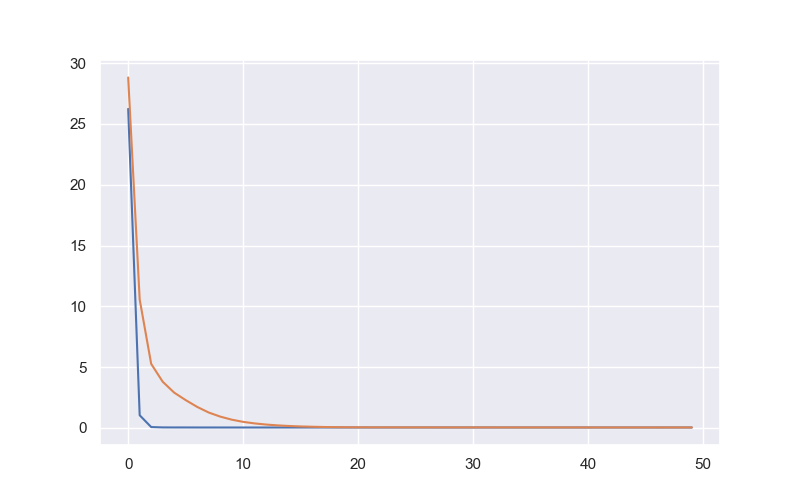

In [37]:
# per le funzioni di ottimizzazione (e per la funzione di costo) si possono utilizzare i parametri di default
# oppure settare manualmente alcune impostazioni: clipnorm o clipvalue di solito per limitare il valore della derivata
# e controllare la crescita del gradiente
# lr è il learning rate
# sgd = SGD(momentum=0.5, nesterov=True, lr=0.1)
# rmsprop = RMSprop(lr=0.001)
adam = Adam(lr=0.005)
model.compile(loss='mse', optimizer=adam)

# per avviare tensorboard in modo che recuperi i dati di log prodotti dal callback avviare un terminale da anaconda
# posizionarsi nella directory dove gira il notebook e digitare: tensorboard --logdir=logs/
callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)

# callback_early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
# callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-8, patience=50, verbose=1)

callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
# with explicit validation definition
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

backend.clear_session()

<IPython.core.display.Javascript object>


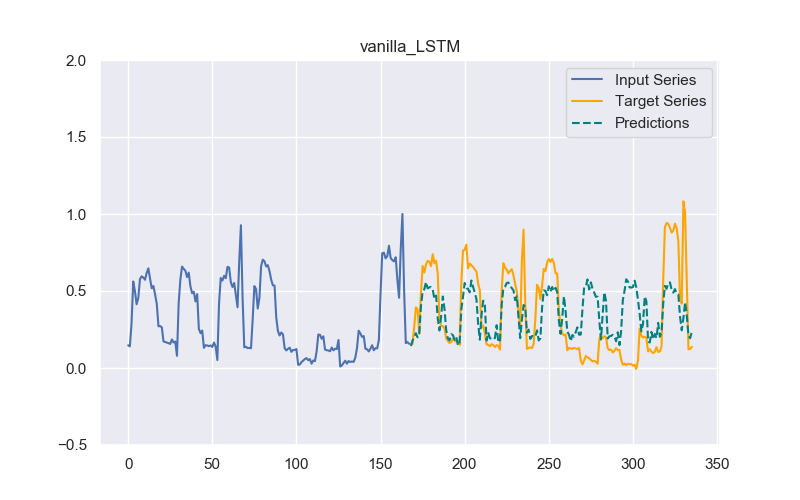

In [39]:
model = load_model(model_path)
predict_and_plot(input_data, target_data, 170, batch_size=batch_size)
backend.clear_session()

## horizontal voting ensamble

another common technique to reduce error and increase prediction performance is to make an ensamble prediction of different models

in the next we will train a simple vanilla LSTM and save the last 10 epochs as separate models, then we make a prediction from the average of the predictions of all the 10 models 

In [40]:
# define samples

first_n_samples = 140
val_n_samples = 160

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

val_x = input_data[first_n_samples:val_n_samples]
val_y = target_data.reshape(-1,n_out)[first_n_samples:val_n_samples]

In [ ]:
# define model

model = Sequential()

model.add(Masking(mask_value=0, input_shape=(n_input, 1), name='input'))
model.add(BatchNormalization())

model.add(GRU(800, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(600, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(600, activation='relu'))

model.add(Dense(n_out, name='output'))

model.compile(loss='mse', optimizer='adam')

# create directory for models
makedirs('voting_ensamble_models', exist_ok=True)

In [ ]:
# train model

losses = []
val_losses = []

n_epochs, n_save_after, n_steps, batch_size, verbose = 40, 30, 1, 20, 0

for i in range(n_epochs):
    # fit model for a single epoch
    model.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=batch_size, epochs=1, verbose=verbose)
    losses.append(model.history.history['loss'][0])
    val_losses.append(model.history.history['val_loss'][0])
    # check if we should save the model
    if (i >= n_save_after) and (i//n_steps == i/n_steps):
        model.save('voting_ensamble_models/model_' + str(i) + '.h5')

plt.figure()
plt.plot(losses, label='train')
plt.plot(val_losses, label='test')
plt.show()

>loaded voting_ensamble_models/model_30.h5
>loaded voting_ensamble_models/model_31.h5
>loaded voting_ensamble_models/model_32.h5
>loaded voting_ensamble_models/model_33.h5
>loaded voting_ensamble_models/model_34.h5
>loaded voting_ensamble_models/model_35.h5
>loaded voting_ensamble_models/model_36.h5
>loaded voting_ensamble_models/model_37.h5
>loaded voting_ensamble_models/model_38.h5
>loaded voting_ensamble_models/model_39.h5


<IPython.core.display.Javascript object>


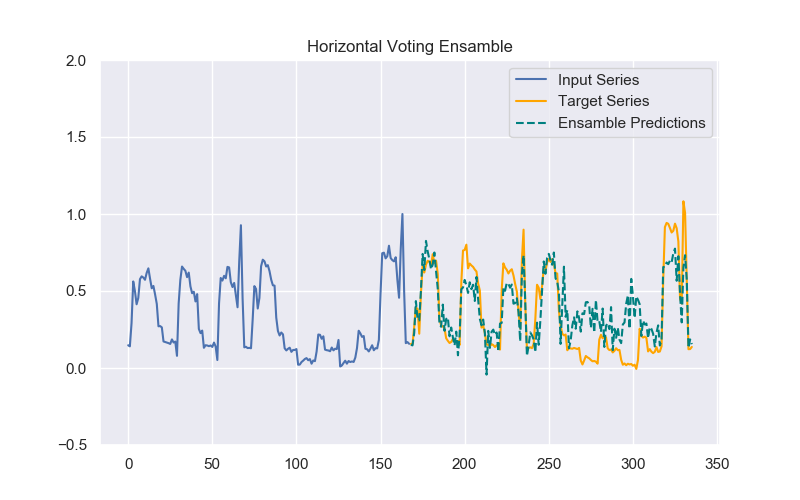

In [43]:
# load all models, predict and plot

all_models = list()

for epoch in range(n_save_after, n_epochs, n_steps):
    # define filename for this ensemble
    filename = 'voting_ensamble_models/model_' + str(epoch) + '.h5'
    # load model from file
    model = load_model(filename)
    # add to list of members
    all_models.append(model)
    print('>loaded %s' % filename)

sample_ind = 170

encode_series = input_data[sample_ind-1:sample_ind,:,:]

# make predictions
predictions = [model.predict(encode_series) for model in all_models]

# average across ensemble members
ensamble_predictions = np.mean(predictions, axis=0)

encode_series = encode_series[-1]
pred_series = ensamble_predictions[-1]
target_series = target_data[sample_ind-1]

encode_series_tail = encode_series[-168:]
x_encode = encode_series_tail.shape[0]

plt.figure()

plt.plot(encode_series_tail)
plt.plot(range(x_encode,x_encode+n_out),target_series,color='orange')
plt.plot(range(x_encode,x_encode+n_out),pred_series,color='teal',linestyle='--')

plt.title('Horizontal Voting Ensamble')
plt.legend(['Input Series','Target Series','Ensamble Predictions'])
plt.ylim(-0.5,2)

plt.show()

backend.clear_session()

## seq2seq encoder-decoder (simplistic architectures from Jason Brownlee's blog)

in this simplistic approach the encoder is only used to obtain the internal representation of the sequence, then we try to make the prediction from the internal representation only with the decoder (an LSTM)

we will try different kind of networks for the encoder but we will see that generally we do not have enough power to interpret the input signal then the only thing network can do is to output an average predicted value

In [44]:
first_n_samples, epochs, batch_size, verbose = 140, 20, 20, 1

val_n_samples = 160

train_x = input_data[:first_n_samples]
train_y = target_data[:first_n_samples]

val_x = input_data[first_n_samples:val_n_samples]
val_y = target_data[first_n_samples:val_n_samples]

### LSTM encoder - LSTM decoder

In [45]:
name = 'lstm_enc_dec'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

model = Sequential()

model.add(Masking(mask_value=0, input_shape=(n_input, 1), name='input'))
model.add(BatchNormalization())

# encoder
model.add(GRU(660, activation='relu', activity_regularizer=l1()))

# workaround for encoder-decoder connection
model.add(RepeatVector(n_out))

# decoder
model.add(GRU(330, activation='relu', return_sequences=True, activity_regularizer=l1()))
# questa funzione applica il layer in oggetto separatamente ad ogni elemento della sequenza di input
model.add(TimeDistributed(Dense(400, activation='relu')))
model.add(BatchNormalization())
model.add(TimeDistributed(Dense(200, activation='relu')))
model.add(BatchNormalization())
model.add(TimeDistributed(Dense(1)))

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Masking)              (None, 672, 1)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 672, 1)            4         
_________________________________________________________________
gru_1 (GRU)                  (None, 660)               1310760   
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 168, 660)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 168, 330)          981090    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 168, 400)          132400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 168, 400)          1600      
__________

Train on 140 samples, validate on 20 samples
Epoch 1/20
140/140 [==============================] - 24s 170ms/step - loss: 11.2444 - val_loss: 1.2373
Epoch 2/20
140/140 [==============================] - 24s 174ms/step - loss: 1.2031 - val_loss: 1.1962
Epoch 3/20
140/140 [==============================] - 28s 199ms/step - loss: 0.9664 - val_loss: 1.1125
Epoch 4/20
140/140 [==============================] - 29s 208ms/step - loss: 0.8606 - val_loss: 0.9728
Epoch 5/20
140/140 [==============================] - 30s 218ms/step - loss: 0.7635 - val_loss: 0.8609
Epoch 6/20
140/140 [==============================] - 31s 221ms/step - loss: 0.6794 - val_loss: 0.7569
Epoch 7/20
140/140 [==============================] - 30s 218ms/step - loss: 0.6041 - val_loss: 0.6661
Epoch 8/20
140/140 [==============================] - 30s 216ms/step - loss: 0.5386 - val_loss: 0.5913
Epoch 9/20
140/140 [==============================] - 29s 206ms/step - loss: 0.4791 - val_loss: 0.5209
Epoch 10/20
140/140 [======

<IPython.core.display.Javascript object>


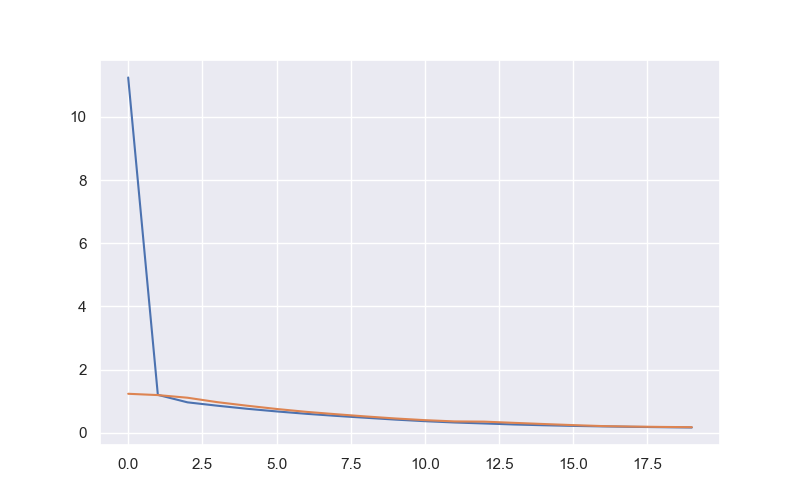

In [46]:
model.compile(loss='mse', optimizer='adam')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

backend.clear_session()

<IPython.core.display.Javascript object>


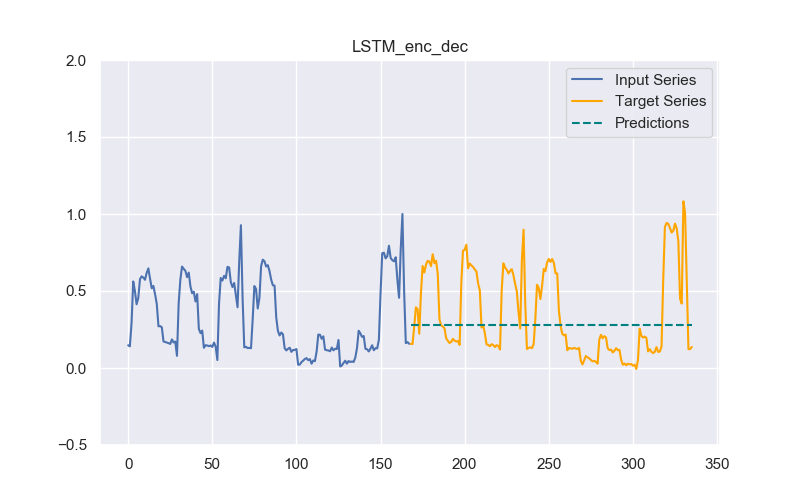

In [47]:
model = load_model(model_path)
predict_and_plot(input_data, target_data, 170)
backend.clear_session()

### 1D ConvNet encoder - LSTM decoder

In [52]:
name = 'cnn_enc_dec'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

model = Sequential()
model.add(BatchNormalization(input_shape=(n_input, 1)))

# conv encoder
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# connection layer
model.add(RepeatVector(n_out))

# lstm decoder
model.add(LSTM(400, activation='relu', return_sequences=True, activity_regularizer=l1()))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 672, 1)            4         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 667, 64)           448       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 662, 64)           24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 331, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21184)             0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 168, 21184)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 400)          34536000  
__________

Train on 140 samples, validate on 20 samples
Epoch 1/10
140/140 [==============================] - 102s 727ms/step - loss: 79.6286 - val_loss: 0.1399
Epoch 2/10
140/140 [==============================] - 98s 703ms/step - loss: 0.1388 - val_loss: 0.1096
Epoch 3/10
140/140 [==============================] - 97s 693ms/step - loss: 0.1139 - val_loss: 0.0853
Epoch 4/10
140/140 [==============================] - 98s 697ms/step - loss: 0.0825 - val_loss: 0.0685
Epoch 5/10
140/140 [==============================] - 97s 693ms/step - loss: 0.0668 - val_loss: 0.0595
Epoch 6/10
140/140 [==============================] - 100s 716ms/step - loss: 0.0585 - val_loss: 0.0570
Epoch 7/10
140/140 [==============================] - 102s 725ms/step - loss: 0.0559 - val_loss: 0.0578
Epoch 8/10
140/140 [==============================] - 101s 718ms/step - loss: 0.0561 - val_loss: 0.0588
Epoch 9/10
140/140 [==============================] - 101s 718ms/step - loss: 0.0563 - val_loss: 0.0587
Epoch 10/10
140/140 [=

<IPython.core.display.Javascript object>


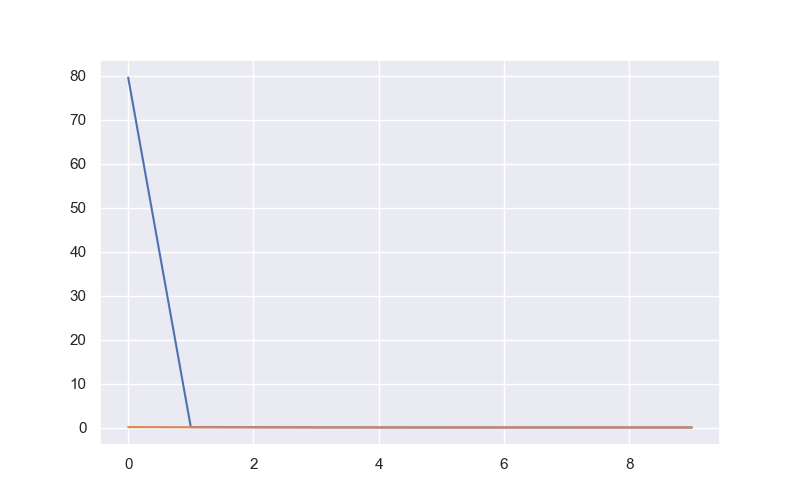

In [53]:
epochs = 10

model.compile(loss='mse', optimizer='adam')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

backend.clear_session()

<IPython.core.display.Javascript object>


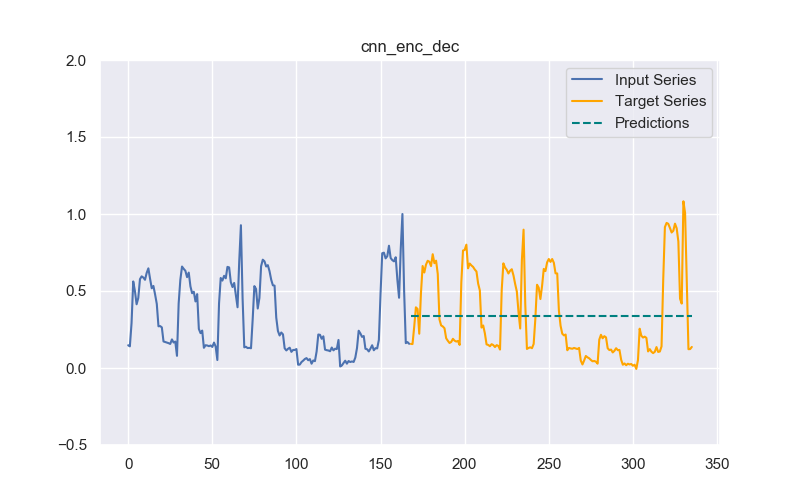

In [54]:
model = load_model(model_path)
predict_and_plot(input_data, target_data, 170)
backend.clear_session()

### 2D ConvLSTM encoder - LSTM decoder

In [55]:
# define the number of subsequences and the length of subsequences
n_steps, n_length = 4, 24*7
# define the total days to use as input
n_input = n_length * n_steps

first_n_samples, epochs, batch_size, verbose = 140, 10, 20, 1

val_n_samples = 160

# input reshaped to 2D ConvLSTM format
train_x = input_data.reshape(-1, n_steps, 1, n_length, 1)[:first_n_samples]
train_y = target_data[:first_n_samples]

val_x = input_data.reshape(-1, n_steps, 1, n_length, 1)[first_n_samples:val_n_samples]
val_y = target_data[first_n_samples:val_n_samples]

In [56]:
name = '2Dcnnlstm_enc_dec'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

model = Sequential()

model.add(BatchNormalization(input_shape=(n_steps, 1, n_length, 1)))

# 2D encoder
model.add(ConvLSTM2D(filters=64, kernel_size=(1,6), activation='relu'))
model.add(Flatten())

# connection layer
model.add(RepeatVector(n_out))

# lstm decoder
model.add(LSTM(400, activation='relu', return_sequences=True, activity_regularizer=l1()))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 4, 1, 168, 1)      4         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 163, 64)        100096    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10432)             0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 168, 10432)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 400)          17332800  
_________________________________________________________________
time_distributed_1 (TimeDist (None, 168, 100)          40100     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 168, 1)            101       
Total para

Train on 140 samples, validate on 20 samples
Epoch 1/10
140/140 [==============================] - 55s 392ms/step - loss: 31.8465 - val_loss: 0.2290
Epoch 2/10
140/140 [==============================] - 51s 364ms/step - loss: 0.1317 - val_loss: 0.1028
Epoch 3/10
140/140 [==============================] - 50s 360ms/step - loss: 0.0972 - val_loss: 0.0818
Epoch 4/10
140/140 [==============================] - 52s 370ms/step - loss: 0.0739 - val_loss: 0.0692
Epoch 5/10
140/140 [==============================] - 50s 360ms/step - loss: 0.0607 - val_loss: 0.0572
Epoch 6/10
140/140 [==============================] - 53s 379ms/step - loss: 0.0562 - val_loss: 0.0578
Epoch 7/10
140/140 [==============================] - 52s 369ms/step - loss: 0.0561 - val_loss: 0.0593
Epoch 8/10
140/140 [==============================] - 53s 381ms/step - loss: 0.0566 - val_loss: 0.0593
Epoch 9/10
140/140 [==============================] - 51s 366ms/step - loss: 0.0563 - val_loss: 0.0583
Epoch 10/10
140/140 [======

<IPython.core.display.Javascript object>


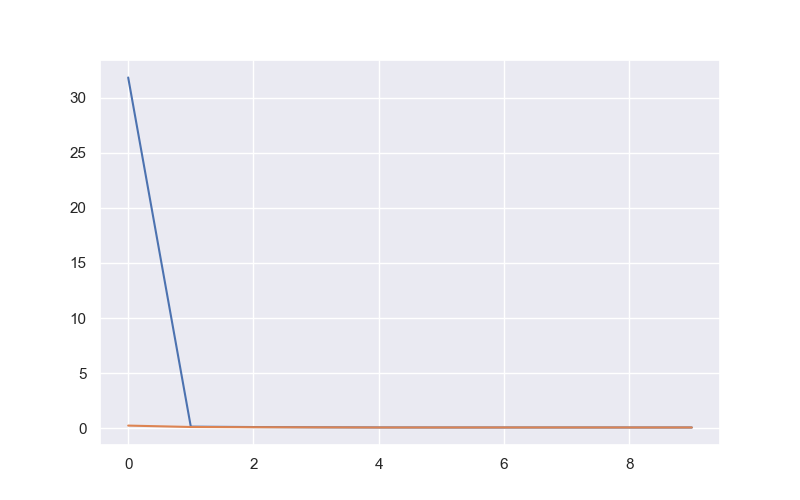

In [57]:
model.compile(loss='mse', optimizer='adam')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

backend.clear_session()

<IPython.core.display.Javascript object>


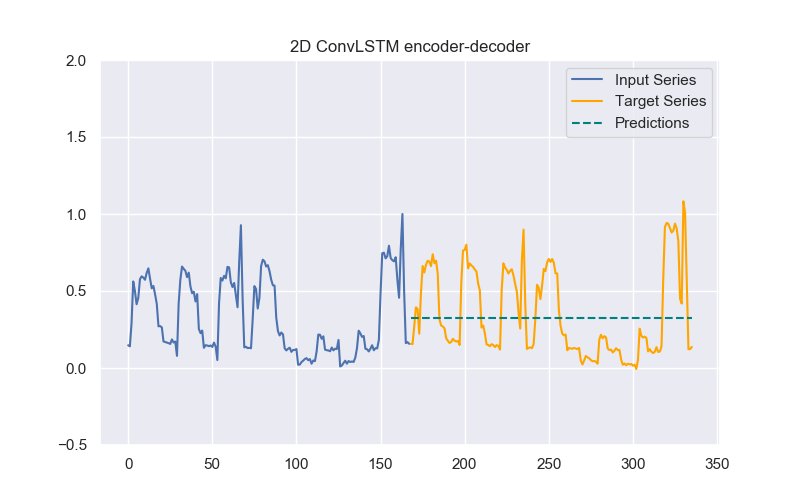

In [58]:
model = load_model(model_path)

sample_ind = 170

encode_series = input_data.reshape(-1, n_steps, 1, n_length, 1)[sample_ind-1:sample_ind,:,:,:,:]
pred_series = model.predict(encode_series)

encode_series = encode_series.reshape(-1,1)
pred_series = pred_series.reshape(-1,1)
target_series = target_data[sample_ind-1]

encode_series_tail = encode_series[-168:]
x_encode = encode_series_tail.shape[0]

plt.figure()

plt.plot(encode_series_tail)
plt.plot(range(x_encode,x_encode+n_out),target_series,color='orange')
plt.plot(range(x_encode,x_encode+n_out),pred_series,color='teal',linestyle='--')

plt.title('2D ConvLSTM encoder-decoder')
plt.legend(['Input Series','Target Series','Predictions'])
plt.ylim(-0.5,2)

plt.show()

backend.clear_session()

## attention LSTM

before to proceed with more complex architectures we will try to implement an lstm with an attention mechanism

the attention mechanism should be able to select most relevant portion of the input signal in order to produce the desired output

the attention layer can be placed before the lstm to filter the input or after the lstm to filter the output, in our case we decided to place the attention layer before the lstm in order to discard irrelevant portion of the signal before lstm processing, this should increase performance and overall result

__following a simple representation of the attention block implemented__

<img src="figures/attention_block_representation.png">

visit __[this link](https://github.com/philipperemy/keras-attention-mechanism)__ for more details

### definitions

In [72]:
import keras.backend as K
from keras.layers import merge
from keras.models import *
from keras.layers.core import *


def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Reshape((input_dim, TIME_STEPS))(a) # this line is not useful. It's just to know which dimension is what.
    a = Dense(TIME_STEPS, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = merge.multiply([inputs, a_probs], name='attention_mul')
    return output_attention_mul


def model_attention_applied_after_lstm():
    inputs = Input(shape=(TIME_STEPS, INPUT_DIM))
    lstm_out = GRU(lstm_units, return_sequences=True)(inputs)
    attention_mul = attention_3d_block(lstm_out)
    attention_mul = Flatten()(attention_mul)
    output = Dense(n_out, activation='relu')(attention_mul)
    model = Model(input=[inputs], output=output)
    return model


def model_attention_applied_before_lstm():
    inputs = Input(shape=(TIME_STEPS, INPUT_DIM))
    attention_mul = attention_3d_block(inputs)
    attention_mul = GRU(lstm_units, return_sequences=True)(attention_mul)
    attention_mul = GRU(lstm_units, return_sequences=False)(attention_mul)
    output = Dense(n_out, activation='relu')(attention_mul)
    model = Model(input=[inputs], output=output)
    return model


def get_activations(model, inputs, print_shape_only=False, layer_name=None):
    # Documentation is available online on Github at the address below.
    # From: https://github.com/philipperemy/keras-visualize-activations
    # print('----- activations -----')
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp] + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions
    layer_outputs = [func([inputs, 1.])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        # if print_shape_only:
        #     print(layer_activations.shape)
        # else:
        #     print(layer_activations)
    return activations


def get_data_recurrent(n, time_steps, input_dim, attention_column=10):
    """
    Data generation. x is purely random except that it's first value equals the target y.
    In practice, the network should learn that the target = x[attention_column].
    Therefore, most of its attention should be focused on the value addressed by attention_column.
    :param n: the number of samples to retrieve.
    :param time_steps: the number of time steps of your series.
    :param input_dim: the number of dimensions of each element in the series.
    :param attention_column: the column linked to the target. Everything else is purely random.
    :return: x: model inputs, y: model targets
    """
    x = np.random.standard_normal(size=(n, time_steps, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    x[:, attention_column, :] = np.tile(y[:], (1, input_dim))
    return x, y

### model

In [82]:
name = 'lstm_attention'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

INPUT_DIM = 1
TIME_STEPS = input_data.shape[1]

# if True, the attention vector is shared across the input_dimensions where the attention is applied.
SINGLE_ATTENTION_VECTOR = False
APPLY_ATTENTION_BEFORE_LSTM = True

lstm_units = 600

if APPLY_ATTENTION_BEFORE_LSTM:
    model = model_attention_applied_before_lstm()
else:
    model = model_attention_applied_after_lstm()

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 672, 1)       0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 1, 672)       0           input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 672)       0           permute_1[0][0]                  
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1, 672)       452256      reshape_1[0][0]                  
__________________________________________________________________________________________________
attention_

In [83]:
first_n_samples, epochs, batch_size, verbose = 160, 20, 20, 1

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

model.compile(optimizer='adam', loss='mse')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks, validation_split=0.125)

backend.clear_session()

Train on 140 samples, validate on 20 samples
Epoch 1/20
140/140 [==============================] - 46s 326ms/step - loss: 0.3282 - val_loss: 0.0937
Epoch 2/20
140/140 [==============================] - 47s 336ms/step - loss: 0.1378 - val_loss: 0.1557
Epoch 3/20
140/140 [==============================] - 48s 341ms/step - loss: 0.1688 - val_loss: 0.1552
Epoch 4/20
140/140 [==============================] - 47s 336ms/step - loss: 0.1634 - val_loss: 0.1451
Epoch 5/20
140/140 [==============================] - 53s 375ms/step - loss: 0.1475 - val_loss: 0.1221
Epoch 6/20
140/140 [==============================] - 45s 320ms/step - loss: 0.1124 - val_loss: 0.0911
Epoch 7/20
140/140 [==============================] - 45s 325ms/step - loss: 0.0819 - val_loss: 0.0670
Epoch 8/20
140/140 [==============================] - 54s 389ms/step - loss: 0.0669 - val_loss: 0.0664
Epoch 9/20
140/140 [==============================] - 50s 358ms/step - loss: 0.0653 - val_loss: 0.0626
Epoch 10/20
140/140 [=======

<IPython.core.display.Javascript object>


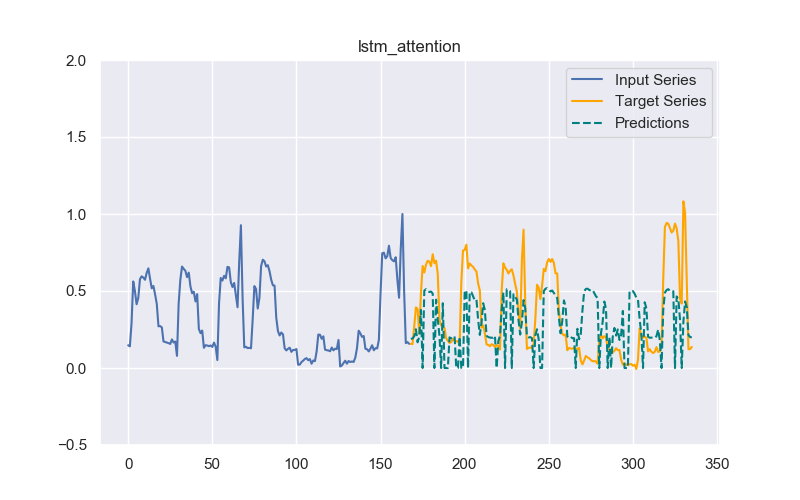

In [84]:
model = load_model(model_path)
predict_and_plot(input_data, target_data, 170)

<IPython.core.display.Javascript object>


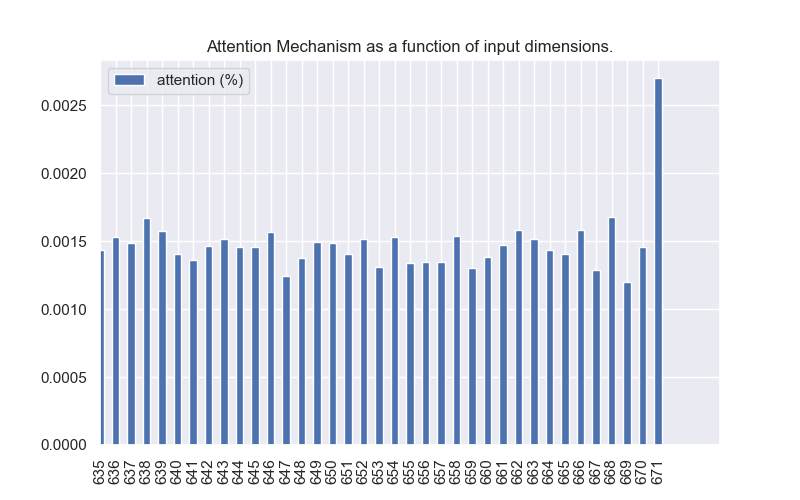

In [88]:
attention_vectors = []

for i in range(300):
    testing_inputs, testing_outputs = get_data_recurrent(1, TIME_STEPS, INPUT_DIM)
    attention_vector = np.mean(get_activations(model, testing_inputs, print_shape_only=True, layer_name='attention_vec')[0], axis=2).squeeze()

    assert (np.sum(attention_vector) - 1.0) < 1e-5
    attention_vectors.append(attention_vector)

attention_vector_final = np.mean(np.array(attention_vectors), axis=0)

pd.DataFrame(attention_vector_final, columns=['attention (%)']).plot(kind='bar', title='Attention Mechanism as a function of input dimensions.')

plt.xlim(635,675)

plt.show()

In [89]:
backend.clear_session()

## _definitions and data prep seq2seq with teacher forcing_

Now we are going to implement a robust encoding-decoding architecture, the 'teacher forcing' approach will be used to train the network (part of the target is included in the input)

the basic approach is to use an lstm as encoder to learn the context of the sequence, then hidden and cell state of the encoder will be used as input for the decoder (another lstm) which learn to predict the sequence "step by step" (with a recursive multistep approach)

input of the encoder is selected to be 4 weeks, output of decoder is 2 weeks with teacher forcing, prediction step length is 1 week (for prediction we used 2 steps only then a 2 weeks prediction)

In [172]:
def decode_sequence(input_seq):
    
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, step_lenght, 1))
    
    # Populate the first target sequence with end of encoding series pageviews
    target_seq[0, :, 0] = input_seq[0, -step_lenght:, 0]

    # Sampling loop for a batch of sequences - we will fill decoded_seq with predictions
    # (to simplify, here we assume a batch of size 1).

    decoded_seq = np.zeros((1,step_lenght*pred_steps,1))
    
    for i in range(pred_steps):
        
        output, h, c = decoder_model.predict([target_seq] + states_value)
        
        decoded_seq[0,i*step_lenght:i*step_lenght+step_lenght,0] = output[0,-step_lenght:,0]

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, step_lenght, 1))
        target_seq[0, :, 0] = output[0,-step_lenght:,0]

        # Update states
        states_value = [h, c]
        
    return decoded_seq

def predict_and_plot_steps(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=24*7):

    encode_series = encoder_input_data[sample_ind-1:sample_ind,:,:] 
    pred_series = decode_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind-1,:,:].reshape(-1,1) 
    
    encode_series_tail = encode_series[-enc_tail_len:]
    x_encode = encode_series_tail.shape[0]
    
    plt.figure()   
    
    plt.plot(encode_series_tail)
    plt.plot(range(x_encode-1,x_encode-1+step_lenght*pred_steps),target_series,color='orange')
    plt.plot(range(x_encode-1,x_encode-1+step_lenght*pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title(name)
    plt.legend(['Encoding Series','Target Series','Predictions'])
    plt.ylim(-0.5,2)
    
    plt.show()

In [60]:
n_input = 24*7*4
n_out = 24*7*2

encoder_input_data, decoder_target_data = to_supervised(dataset, n_input, n_out)

step_lenght = 24*7

pred_steps = n_out // step_lenght

# lagged target series for teacher forcing
decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,step_lenght:,0] = decoder_target_data[:,:-step_lenght,0]
decoder_input_data[:,:step_lenght,0] = encoder_input_data[:,-step_lenght:,0]

for i in range(encoder_input_data.shape[0]):
    scaler = MinMaxScaler(feature_range=(0.01, 1)).fit(encoder_input_data[i])
    encoder_input_data[i] = scaler.transform(encoder_input_data[i])
    decoder_input_data[i] = scaler.transform(decoder_input_data[i])
    decoder_target_data[i] = scaler.transform(decoder_target_data[i])

missing_value = 0

encoder_input_data[np.isnan(encoder_input_data)] = missing_value
decoder_input_data[np.isnan(decoder_input_data)] = missing_value
decoder_target_data[np.isnan(decoder_target_data)] = missing_value

print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(168, 672, 1)
(168, 336, 1)
(168, 336, 1)


<IPython.core.display.Javascript object>


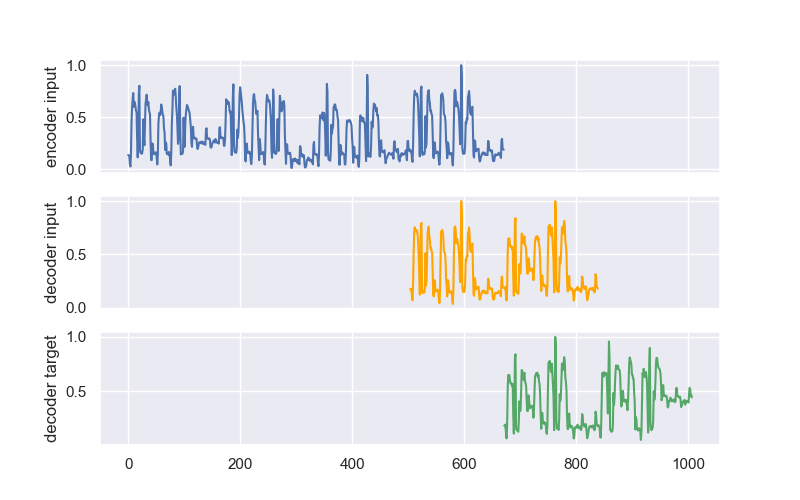

In [61]:
sequence_num = 70

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)

ax1.plot(encoder_input_data[sequence_num])
ax1.set_ylabel('encoder input')

ax2.plot(range(n_input-step_lenght,n_input-step_lenght+n_out), decoder_input_data[sequence_num], color='orange')
ax2.set_ylabel('decoder input')

ax3.plot(range(n_input,n_input+n_out), decoder_target_data[sequence_num], color='g')
ax3.set_ylabel('decoder target')

plt.show()

## seq2seq encoder-decoder (full implementation from Keras blog)

basic idea is to have a sample long enough for the encoder to learn representation of weeks and days of week (so at least 2 or 3 weeks)

encoder states provide context representation (the 3 weeks before) then decoder uses those states with teacher forcing approach which allows the decoder to learn mapping a temporal step (one hour, one day or one week...) to the next one

this operation iterated over the entire available sequence (for example 1 year of data) allows the network to predict for example one week of data with a "recursive multistep" approach where prediction of one step is used to predict next step and again...

__in the following a basic representation of the encoder-decoder architecture__

<img src="figures/ArturSuilin_encoder-decoder.png">

visit __[this link](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html)__ and __[this link](https://github.com/JEddy92/TimeSeries_Seq2Seq/blob/master/notebooks/TS_Seq2Seq_Intro.ipynb)__ for more details

first we train the model to predict one step

In [62]:
name = 'seq2seq_keras_enc_dec'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

latent_dim = 500 # LSTM hidden units
dropout = .50

# Define an input series and encode it with an LSTM. 
encoder_inputs = Input(shape=(None, 1))
masked_encoder_inp = Masking(mask_value=0)(encoder_inputs)
# normalized_encoder_inp = BatchNormalization()(masked_encoder_inp)

encoder_1 = LSTM(latent_dim, dropout=dropout, return_sequences=True)
encoder_outputs = encoder_1(masked_encoder_inp)

encoder_2 = LSTM(latent_dim, dropout=dropout, return_state=True)
encoder_outputs, state_h, state_c = encoder_2(encoder_outputs)

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_inputs = Input(shape=(None, 1))
masked_decoder_inp = Masking(mask_value=0)(decoder_inputs)
normalized_decoder_inp = BatchNormalization()(masked_decoder_inp)

# We set up our decoder using `encoder_states` as initial state.
# We return full output sequences and return internal states as well.
# We don't use the return states in the training model, but we will use them in inference.
decoder_lstm_1 = LSTM(latent_dim, dropout=dropout, return_sequences=True)
decoder_outputs = decoder_lstm_1(normalized_decoder_inp, initial_state=encoder_states)
decoder_lstm_2 = LSTM(latent_dim, dropout=dropout, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm_2(decoder_outputs)

# normalized_decoder_out = BatchNormalization()(decoder_outputs)

# decoder_dense = Dense(100)
# decoder_outputs = decoder_dense(decoder_outputs)

decoder_dense = TimeDistributed(Dense(1))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# encoder_input_data & decoder_input_data into decoder_target_data
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
masking_1 (Masking)             (None, None, 1)      0           input_1[0][0]                    
__________________________________________________________________________________________________
masking_2 (Masking)             (None, None, 1)      0           input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LS

In [63]:
first_n_samples, epochs, batch_size, verbose = 160, 25, 20, 1

train_x_enc = encoder_input_data[:first_n_samples]
train_x_dec = decoder_input_data[:first_n_samples]
train_y = decoder_target_data[:first_n_samples]

model.compile(loss='mse', optimizer='adam')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit([train_x_enc, train_x_dec], train_y, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks, validation_split=0.125)

Train on 140 samples, validate on 20 samples
Epoch 1/25
140/140 [==============================] - 72s 514ms/step - loss: 0.1423 - val_loss: 0.0460
Epoch 2/25
140/140 [==============================] - 71s 505ms/step - loss: 0.0534 - val_loss: 0.0387
Epoch 3/25
140/140 [==============================] - 72s 511ms/step - loss: 0.0433 - val_loss: 0.0281
Epoch 4/25
140/140 [==============================] - 68s 485ms/step - loss: 0.0414 - val_loss: 0.0387
Epoch 5/25
140/140 [==============================] - 68s 489ms/step - loss: 0.0416 - val_loss: 0.0313
Epoch 6/25
140/140 [==============================] - 72s 514ms/step - loss: 0.0392 - val_loss: 0.0291
Epoch 7/25
140/140 [==============================] - 74s 527ms/step - loss: 0.0367 - val_loss: 0.0304
Epoch 8/25
140/140 [==============================] - 73s 523ms/step - loss: 0.0412 - val_loss: 0.0300
Epoch 9/25
140/140 [==============================] - 68s 484ms/step - loss: 0.0381 - val_loss: 0.0298
Epoch 10/25
140/140 [=======

then we reused layers of trained model to build an encoder model and a decoder model separately which can make predictions in a recursive multistep fashion

since the step used is one week, we can see that the first week is predicted using data and shows a slightly more better result with respect to the second week predicted using the prediction of the week before

prediction of second week is worsth because error of the first prediction propagate troughout the model

In [64]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_inputs, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs = decoder_lstm_1(normalized_decoder_inp, initial_state=decoder_states_inputs)
decoder_outputs, state_h, state_c = decoder_lstm_2(decoder_outputs)

decoder_states = [state_h, state_c]

decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

<IPython.core.display.Javascript object>


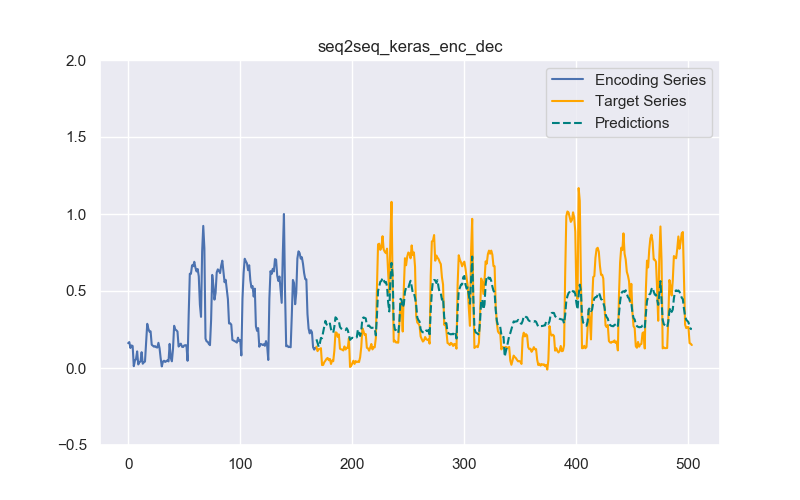

In [65]:
predict_and_plot_steps(encoder_input_data, decoder_target_data, first_n_samples + 7)
backend.clear_session()

## bi-directional encoder-decoder with attention

this architecture contains many complex elements of sequential learning, basically is the same architecture as before (an encoder-decoder) but we added:

1. an attention layer before the encoder to make the context more "focused"
2. a bidirectional wrapper to the encoder in order to take into account for possible inverse dependencies

In [164]:
from keras.layers import Bidirectional
from keras.layers import Concatenate
from keras.layers import Average

def attention_3d_block(inputs):
    input_dim = 1
    a = Permute((2, 1))(inputs)
    a = Dense(n_input, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = merge.multiply([inputs, a_probs], name='attention_mul')
    return output_attention_mul

In [179]:
name = 'att_bidir_enc_dec'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

SINGLE_ATTENTION_VECTOR = False
latent_dim = 500 # LSTM hidden units
dropout = .20

# Define an input series and encode it with an LSTM.
encoder_inputs = Input(shape=(n_input, 1))

attention_mul = attention_3d_block(encoder_inputs)

encoder_1 = Bidirectional(LSTM(latent_dim, dropout=dropout, return_sequences=True))
encoder_outputs = encoder_1(attention_mul)

encoder_2 = Bidirectional(LSTM(latent_dim, dropout=dropout, return_state=True), merge_mode='ave')
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_2(encoder_outputs)

state_h = Average()([forward_h, backward_h])
state_c = Average()([forward_c, backward_c])

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_inputs = Input(shape=(None, 1))
masked_decoder_inp = Masking(mask_value=0)(decoder_inputs)
normalized_decoder_inp = BatchNormalization()(masked_decoder_inp)

# We set up our decoder using `encoder_states` as initial state.
# We return full output sequences and return internal states as well.
# We don't use the return states in the training model, but we will use them in inference.
decoder_lstm_1 = LSTM(latent_dim, dropout=dropout, return_sequences=True)
decoder_outputs = decoder_lstm_1(normalized_decoder_inp, initial_state=encoder_states)
decoder_lstm_2 = LSTM(latent_dim, dropout=dropout, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm_2(decoder_outputs)

decoder_dense = TimeDistributed(Dense(1))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# encoder_input_data & decoder_input_data into decoder_target_data
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 672, 1)       0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 1, 672)       0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1, 672)       452256      permute_1[0][0]                  
__________________________________________________________________________________________________
attention_vec (Permute)         (None, 672, 1)       0           dense_1[0][0]                    
__________________________________________________________________________________________________
attention_

In [168]:
first_n_samples, epochs, batch_size, verbose = 160, 25, 20, 1

train_x_enc = encoder_input_data[:first_n_samples]
train_x_dec = decoder_input_data[:first_n_samples]
train_y = decoder_target_data[:first_n_samples]

model.compile(loss='mse', optimizer='adam')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit([train_x_enc, train_x_dec], train_y, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks, validation_split=0.125)

Train on 140 samples, validate on 20 samples
Epoch 1/25
140/140 [==============================] - 141s 1s/step - loss: 0.1199 - val_loss: 0.0512
Epoch 2/25
140/140 [==============================] - 142s 1s/step - loss: 0.0437 - val_loss: 0.0296
Epoch 3/25
140/140 [==============================] - 135s 965ms/step - loss: 0.0345 - val_loss: 0.0212
Epoch 4/25
140/140 [==============================] - 131s 934ms/step - loss: 0.0322 - val_loss: 0.0254
Epoch 5/25
140/140 [==============================] - 134s 954ms/step - loss: 0.0333 - val_loss: 0.0192
Epoch 6/25
140/140 [==============================] - 133s 953ms/step - loss: 0.0334 - val_loss: 0.0215
Epoch 7/25
140/140 [==============================] - 131s 936ms/step - loss: 0.0266 - val_loss: 0.0172
Epoch 8/25
140/140 [==============================] - 132s 946ms/step - loss: 0.0297 - val_loss: 0.0182
Epoch 9/25
140/140 [==============================] - 139s 994ms/step - loss: 0.0289 - val_loss: 0.0206
Epoch 10/25
140/140 [====

In [169]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_inputs, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs = decoder_lstm_1(normalized_decoder_inp, initial_state=decoder_states_inputs)
decoder_outputs, state_h, state_c = decoder_lstm_2(decoder_outputs)

decoder_states = [state_h, state_c]

decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

<IPython.core.display.Javascript object>


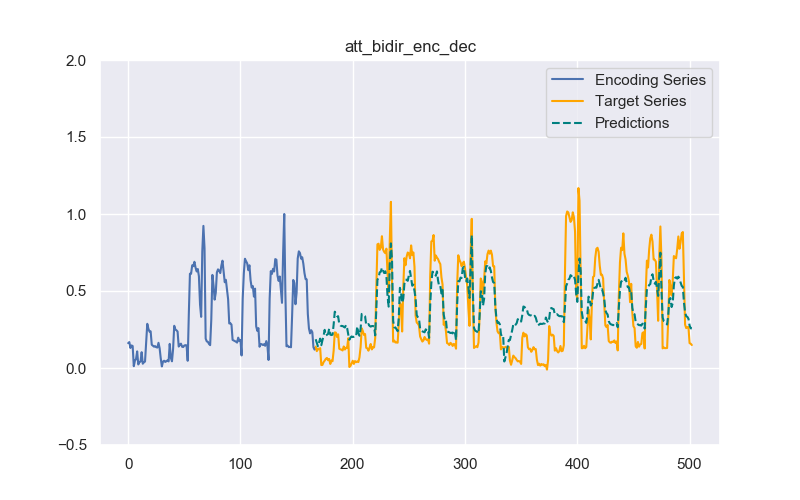

In [178]:
predict_and_plot_steps(encoder_input_data, decoder_target_data, first_n_samples + 7)
backend.clear_session()

## dilated causal convolution (temporal convolutional network without residual block)

after encoder-decoder architecture we want to focus on a powerful emerging technique involving convolutional neural network

the technique is referred to as dilated convolution, it involves multiple convolutional layers with kernel dilated in exponentially increasing order

this particular technique allows to preserve a connection between past and present data and to "memorize" very long sequences but at the sime time overall number of parameters is kept low, so the final result is a big capacity but with less parameters and then faster optimizations

also in this case the teacher forcing approach has been used with a step of 1 week

__basic functionality of dilated convolution can be understood from this picture__

<img src="figures/wave_net_principle.gif">

visit __[this link](https://github.com/JEddy92/TimeSeries_Seq2Seq/blob/master/notebooks/TS_Seq2Seq_Conv_Intro.ipynb)__ for more details

### definitions and data

In [180]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps*step_lenght,1))
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-step_lenght:,0]
        pred_sequence[0,i*step_lenght:i*step_lenght+step_lenght,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence[:,step_lenght:,:], last_step_pred.reshape(-1,step_lenght,1)], axis=1)

    return pred_sequence

def predict_and_plot_sequence(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=24*7):

    encode_series = encoder_input_data[sample_ind-1:sample_ind,:,:] 
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind-1,:,:].reshape(-1,1) 
    
    encode_series_tail = encode_series[-enc_tail_len:]
    x_encode = encode_series_tail.shape[0]
    
    plt.figure()   
    
    plt.plot(encode_series_tail)
    plt.plot(range(x_encode-1,x_encode-1+pred_steps*step_lenght),target_series,color='orange')
    plt.plot(range(x_encode-1,x_encode-1+pred_steps*step_lenght),pred_series,color='teal',linestyle='--')
    
    plt.title(name)
    plt.legend(['Encoding Series','Target Series','Predictions'])
    plt.ylim(-0.5,2)
    
    plt.show()

In [91]:
# since here we do not use encoder decoder architecture
# to train with teacher forcing we use the decoder input as target
input_data = encoder_input_data
target_data = decoder_input_data

### model

In [117]:
name = 'dilated_cnn'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

# convolutional layer parameters
n_filters = 32
filter_width = 2
dilation_rates = [2**i for i in range(8)]

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))

x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(1)(x)

# extract the last n_out time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':n_out})(x)

model = Model(history_seq, pred_seq_train)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          2080      
__________

__from the history of model training below it can be seen that this models requires only ten epochs to converge for an overall optimization time of about 10 seconds!!__

In [118]:
first_n_samples, epochs, batch_size, verbose = 160, 10, 20, 1

train_x = input_data[:first_n_samples]
train_y = target_data[:first_n_samples]

model.compile('adam', loss='mean_absolute_error')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks, validation_split=0.125)

backend.clear_session()

Train on 140 samples, validate on 20 samples
Epoch 1/10
140/140 [==============================] - 2s 14ms/step - loss: 0.2655 - val_loss: 0.2085
Epoch 2/10
140/140 [==============================] - 1s 5ms/step - loss: 0.2023 - val_loss: 0.1904
Epoch 3/10
140/140 [==============================] - 1s 5ms/step - loss: 0.1865 - val_loss: 0.1614
Epoch 4/10
140/140 [==============================] - 1s 5ms/step - loss: 0.1623 - val_loss: 0.1214
Epoch 5/10
140/140 [==============================] - 1s 6ms/step - loss: 0.1396 - val_loss: 0.1027
Epoch 6/10
140/140 [==============================] - 1s 7ms/step - loss: 0.1239 - val_loss: 0.0908
Epoch 7/10
140/140 [==============================] - 1s 7ms/step - loss: 0.1151 - val_loss: 0.0808
Epoch 8/10
140/140 [==============================] - 1s 7ms/step - loss: 0.1094 - val_loss: 0.0772
Epoch 9/10
140/140 [==============================] - 1s 7ms/step - loss: 0.1046 - val_loss: 0.0782
Epoch 10/10
140/140 [==============================] -

__as can be seen from a visual comparison model predictions are astonishingly good considered nothing hyperparameters tuning and very short optimization time__ (remember that as before the second week has been obtained from the prediction of the week before...)

<IPython.core.display.Javascript object>


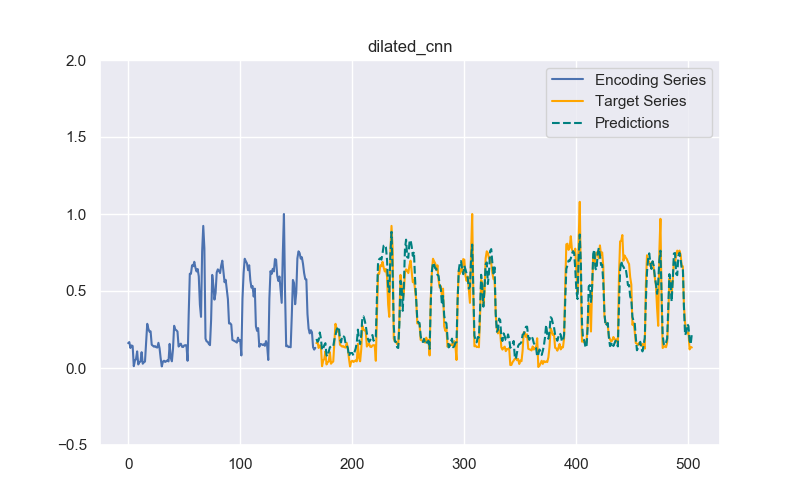

In [119]:
model = load_model(model_path)
predict_and_plot_sequence(input_data, target_data, first_n_samples + 7)
backend.clear_session()

## full temporal convolutional network

this last architecture represents currently one of the best approaches to sequence modeling that can be applied to time series prediction

it is computationally less expensive, faster and with generally better performances with respect to other recurrent neural network

the core element is still a dilated convolutional network but there is also a residual block which takes the output of the stacked dilated cnn and add it to the input to obtain the final output

again teacher forcing has been used to train the network

__basic elements fo a temporal convolutional network architecture__

<img src="figures/tcn_basic_elements.png">

visit __[this link](https://github.com/philipperemy/keras-tcn)__ or __[this link](https://medium.com/the-artificial-impostor/notes-understanding-tensorflow-part-3-7f6633fcc7c7)__ for more details

### definitions

In [120]:
import keras.backend as K
import keras.layers
from keras import optimizers
from keras.engine.topology import Layer
from keras.layers import Activation, Lambda
from keras.layers import Conv1D, SpatialDropout1D
from keras.layers import Convolution1D, Dense
from keras.models import Input, Model
from typing import List, Tuple


def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return keras.layers.multiply([tanh_out, sigm_out])


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = keras.layers.add([original_x, x])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


class TCN:
    """Creates a TCN layer.

    Input shape:
        A tensor of shape (batch_size, timesteps, input_dim).

    Args:
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        activation: The activations to use (norm_relu, wavenet, relu...).
        padding: The padding to use in the convolutional layers, 'causal' or 'same'.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A TCN layer.
    """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16, 32],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = keras.layers.add(skip_connections)
        x = Activation('relu')(x)
        
        x = Dense(128, activation='relu')(x)
        x = Dropout(.2)(x)
        x = Dense(1)(x)

        if not self.return_sequences:
            output_slice_index = -n_out
            x = Lambda(lambda tt: tt[:, output_slice_index:, :])(x)
        return x

### model

In [121]:
name = 'temporal_cnn'
plot_path = 'net_plots/'+name+'.png'
model_path = 'best_models/'+name+'.h5'

input_len = None
num_feat = 1

n_filters = 32
filter_width = 2
dilation_rates = [2**i for i in range(8)]

dilation_rates = process_dilations(dilation_rates)

input_layer = Input(shape=(input_len, num_feat))

output_layer = TCN(return_sequences=False, dilations=dilation_rates, nb_filters=n_filters, kernel_size=filter_width, name='TCN_1')(input_layer)
# a second TCN could be stacked to the first...
# x = TCN(return_sequences=False, name='TCN_2')(x)

print('x.shape=', x.shape)

print(f'model.x = {input_layer.shape}')
print(f'model.y = {output_layer.shape}')

model = Model(input_layer, output_layer)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

x.shape= (?, ?, 1)
model.x = (?, ?, 1)
model.y = (?, ?, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
TCN_1_initial_conv (Conv1D)     (None, None, 32)     64          input_1[0][0]                    
__________________________________________________________________________________________________
TCN_1_d_causal_conv_1_tanh_s0 ( (None, None, 32)     2080        TCN_1_initial_conv[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, 32)     0           TCN_1_d_causal_conv_1_tanh_s0[0][
__________________________________________________

In [122]:
first_n_samples, epochs, batch_size, verbose = 160, 20, 20, 1

train_x = input_data[:first_n_samples]
train_y = target_data[:first_n_samples]

adam = optimizers.Adam(lr=0.002, clipnorm=1.)
model.compile(adam, loss='mean_squared_error')

callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks = [callback_tensorboard, callback_model_checkpoint]

# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=callbacks, validation_split=0.125)

backend.clear_session()

Train on 140 samples, validate on 20 samples
Epoch 1/20
140/140 [==============================] - 5s 33ms/step - loss: 0.2170 - val_loss: 0.0323
Epoch 2/20
140/140 [==============================] - 2s 12ms/step - loss: 0.0405 - val_loss: 0.0176
Epoch 3/20
140/140 [==============================] - 2s 12ms/step - loss: 0.0276 - val_loss: 0.0114
Epoch 4/20
140/140 [==============================] - 2s 13ms/step - loss: 0.0252 - val_loss: 0.0101
Epoch 5/20
140/140 [==============================] - 2s 13ms/step - loss: 0.0237 - val_loss: 0.0119
Epoch 6/20
140/140 [==============================] - 2s 14ms/step - loss: 0.0226 - val_loss: 0.0109
Epoch 7/20
140/140 [==============================] - 2s 16ms/step - loss: 0.0216 - val_loss: 0.0106
Epoch 8/20
140/140 [==============================] - 2s 16ms/step - loss: 0.0209 - val_loss: 0.0104
Epoch 9/20
140/140 [==============================] - 3s 18ms/step - loss: 0.0204 - val_loss: 0.0101
Epoch 10/20
140/140 [=========================

<IPython.core.display.Javascript object>


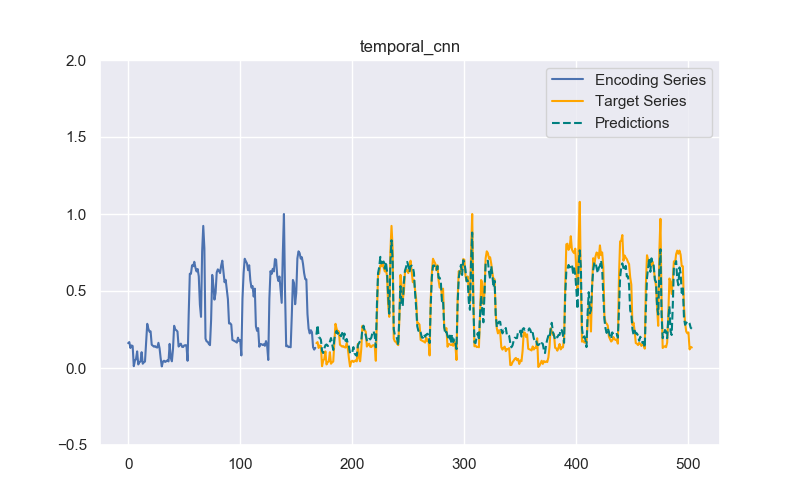

In [125]:
model = load_model(model_path)
predict_and_plot_sequence(input_data, target_data, first_n_samples + 7)
backend.clear_session()

# Machine Learning

__feature engineering__ + __ML (random forest, xgboost, lightGBM....)__

to be continued....